# Screening Supplement

In this notebook we visualize our results for various screening simulation experients.

We begin by importing required packages.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as opt
import statistics
from scipy import stats
import ptitprince as pt
import os
import re
import csv 
from datetime import date
from statannotations.Annotator import Annotator
from sklearn import metrics


# Our libraries
import libraries.disturbances as dt
import libraries.normalization as nrm
import libraries.utilities as util
import libraries.screening as sc

# Visual Examples

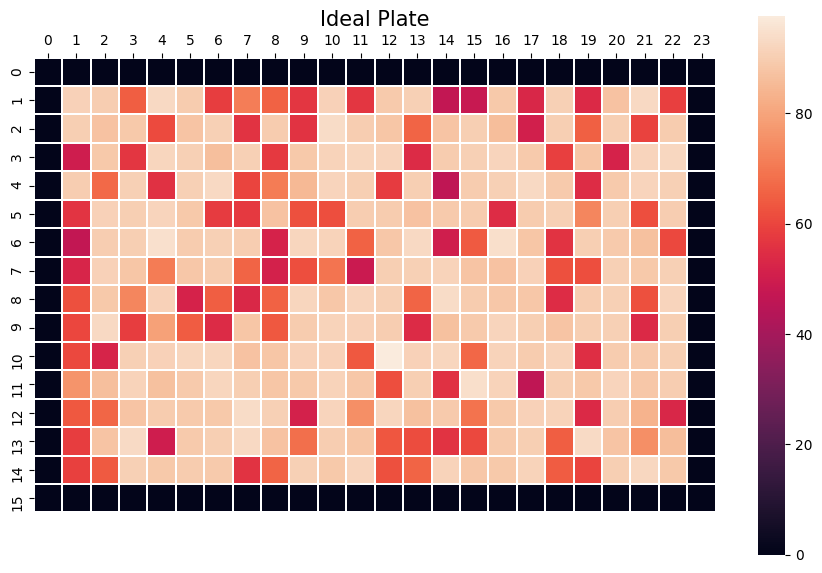

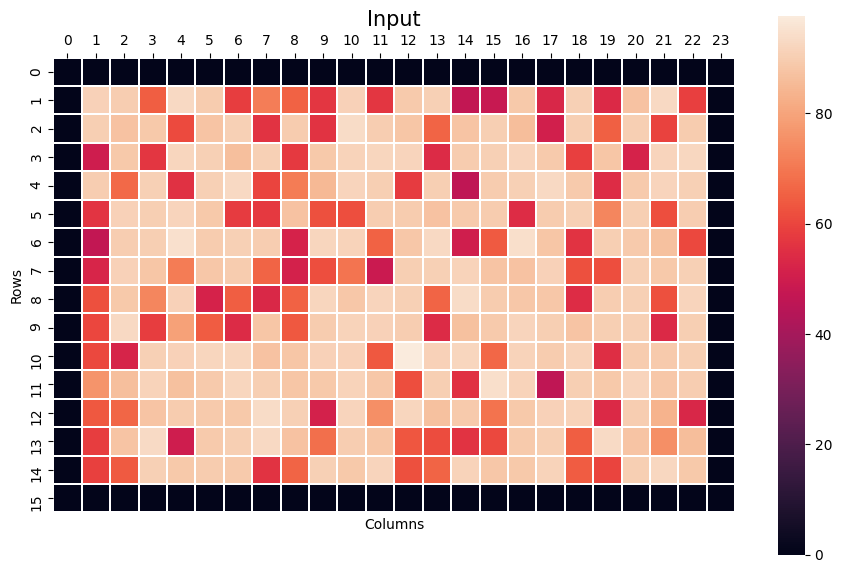

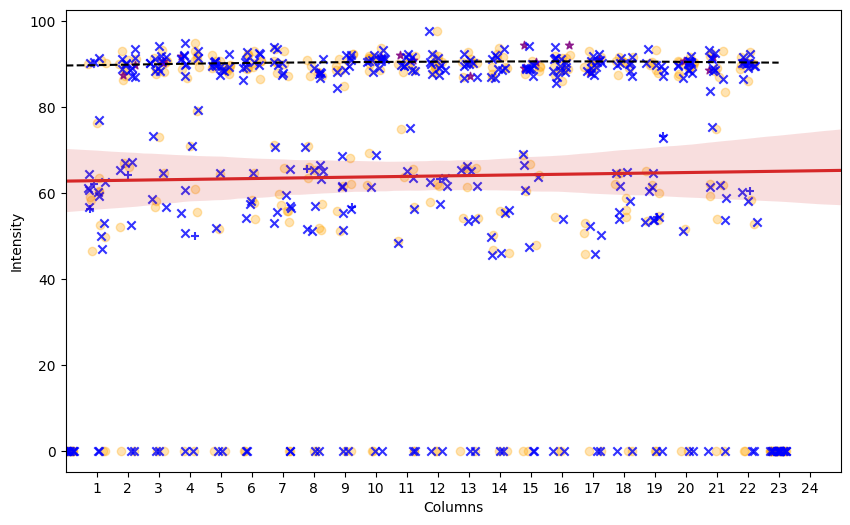

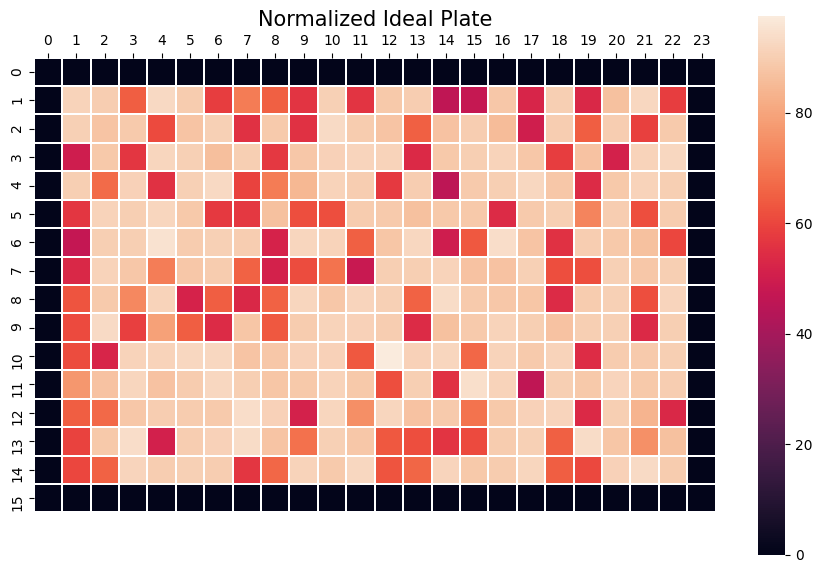

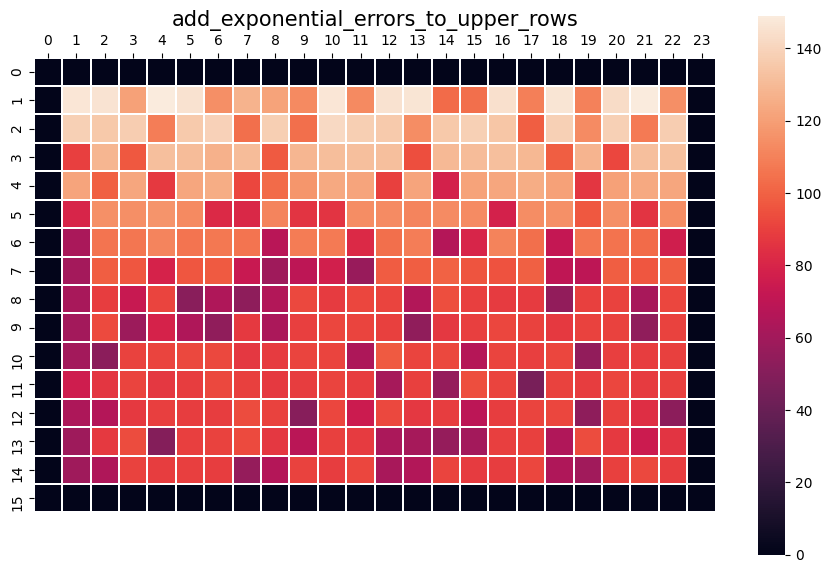

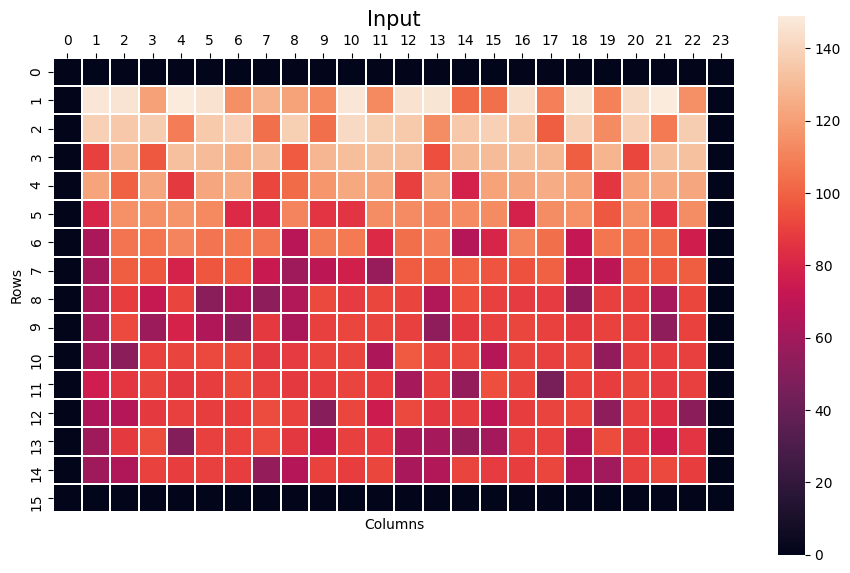

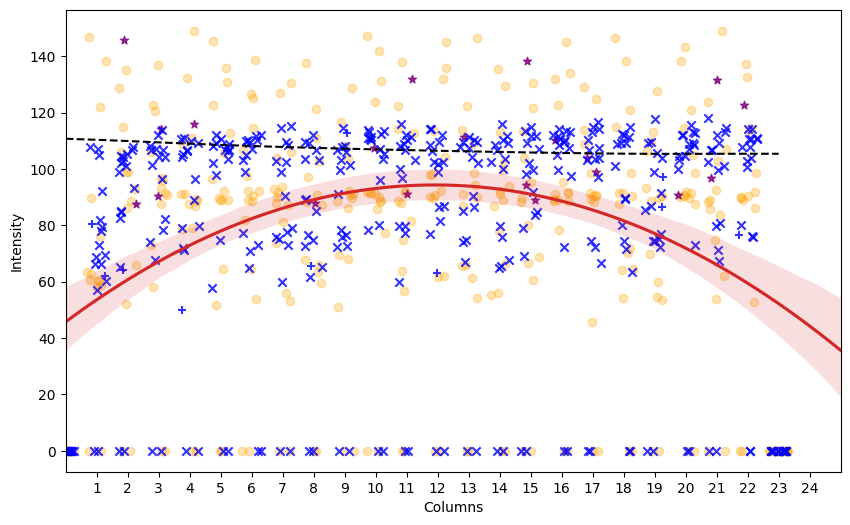

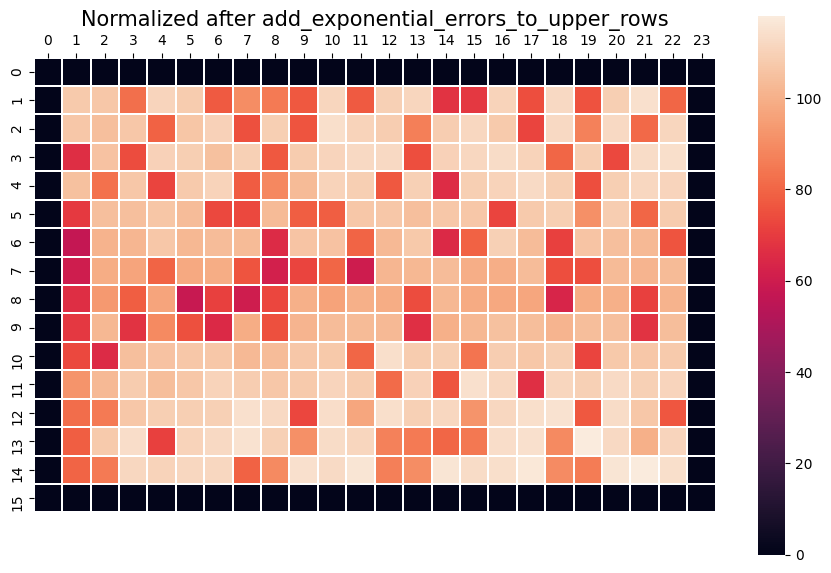

In [2]:
fig_dir = 'generated-plots/screening-supplement/'
data_dir = 'generated-data/screening/'

layout_dir = 'layouts/screening_manual_layouts/'
layout_file = 'plate_layout_rand_20-10_02.npy'

layout = np.load(layout_dir+layout_file)  
            
neg_control_id = np.max(layout)
pos_control_id = neg_control_id -1 

neg_control_mean = 90
pos_control_mean = 60
neg_stdev = 2
pos_stdev = 7

np.random.seed(42)

ideal_plate, _ = sc.fill_plate(layout,neg_control_id,pos_control_id,neg_control_mean,pos_control_mean,neg_stdev,pos_stdev)
util.plot_plate(pd.DataFrame(ideal_plate), title="Ideal Plate")
norm_plate = util.plot_well_series(ideal_plate,layout,neg_control_id,pos_control_id,order=1,filename=fig_dir+'random-none')
util.plot_plate(pd.DataFrame(norm_plate), title="Normalized Ideal Plate")

disturbed_plate = dt.add_linear_errors_to_upper_rows_half(ideal_plate, 4)
util.plot_plate(pd.DataFrame(disturbed_plate), title="add_exponential_errors_to_upper_rows")

norm_plate = util.plot_well_series(disturbed_plate,layout,neg_control_id,pos_control_id,order=2,vmin=None,vmax=None,filename=fig_dir+'norm_plate_random')
util.plot_plate(pd.DataFrame(norm_plate), title="Normalized after add_exponential_errors_to_upper_rows")


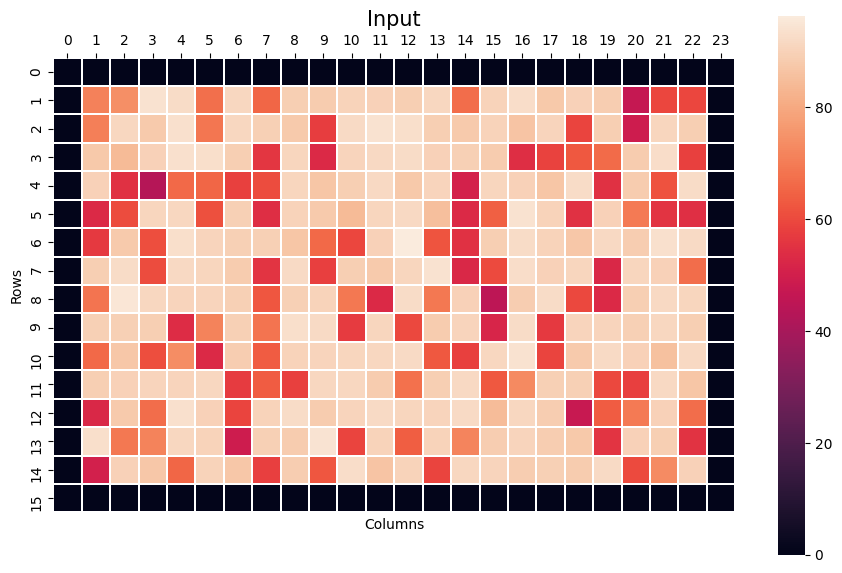

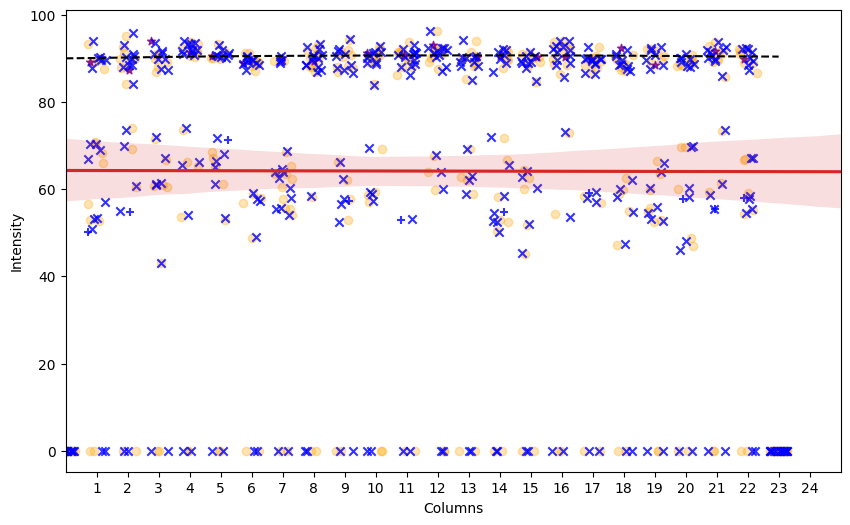

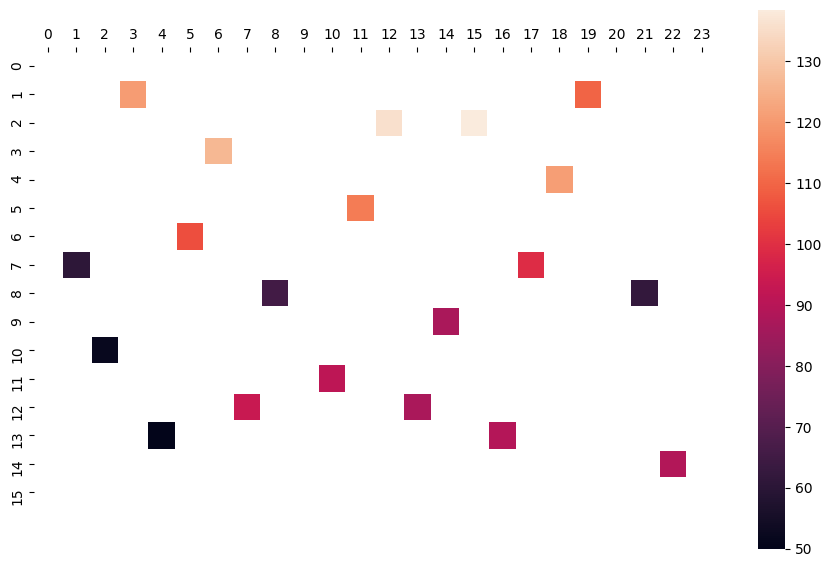

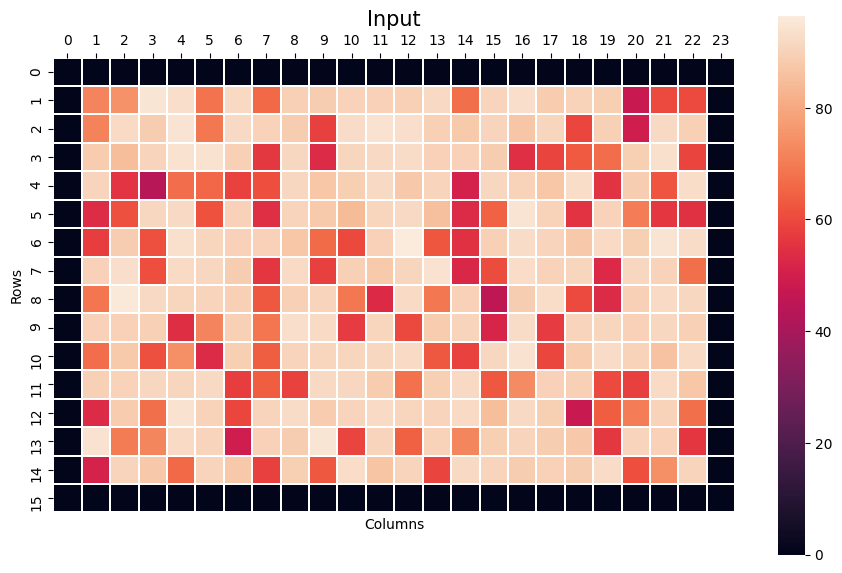

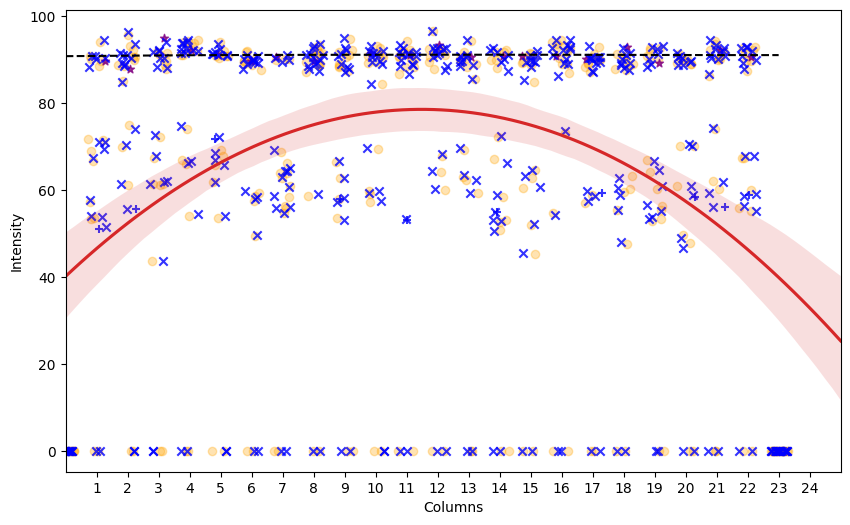

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , 70.97912255, 74.11930993, 94.09444114, 92.29231959,
        66.95928324, 90.90077305, 65.09632888, 88.48253374, 87.8890162 ,
        89.46156294, 89.07274866, 88.45332899, 90.75132218, 66.09688016,
        89.64051985, 92.47574847, 87.29740516, 89.25645273, 88.27519243,
        46.70839543, 59.25789705, 59.04090088,  0.        ],
       [ 0.        , 71.03870837, 91.59849037, 88.18326763, 93.84397955,
        68.59828872, 91.14012184, 89.45504044, 87.92623399, 57.18017382,
        91.90601638, 93.4424978 , 92.70647943, 88.64105573, 87.43071612,
        90.00568586, 86.24401687, 90.48732611, 58.87076083, 89.03697136,
  

In [3]:
layout_dir = 'layouts/screening_PLAID_layouts/'
layout_file = 'plate_layout_20-10_01.npy'

layout = np.load(layout_dir+layout_file)  
            
neg_control_id = np.max(layout)
pos_control_id = neg_control_id -1 

neg_control_mean = 90
pos_control_mean = 60
neg_stdev = 2
pos_stdev = 7

ideal_plate, _ = sc.fill_plate(layout,neg_control_id,pos_control_id,neg_control_mean,pos_control_mean,neg_stdev,pos_stdev)
plate_df = pd.DataFrame(ideal_plate)


util.plot_well_series(plate_df,layout,neg_control_id,pos_control_id,filename='PLAID-none')

control_locations=util.get_controls_layout(layout)
util.plot_plate(disturbed_plate, title="", mask=np.array(1-control_locations,dtype=bool), filename = fig_dir+"plaid-controls-rows-error.png")


disturbed_plate = dt.add_bowlshaped_errors(ideal_plate, 0.05)
util.plot_well_series(pd.DataFrame(disturbed_plate),layout,neg_control_id,pos_control_id,order=2,filename=fig_dir+'PLAID-bowlshape',vmin=None,vmax=None)


# Paper & Supplement Plots

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:9.574e-01 t=5.359e-02
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:3.755e-01 t=-8.914e-01
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:3.142e-01 t=1.013e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:3.387e-11 t=-7.712e+00
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:4.699e-01 t=7.261e-01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:1.269e-13 t=-8.964e+00


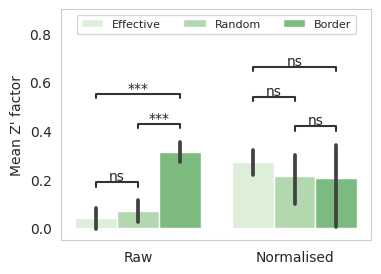

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:2.406e-01 t=-1.182e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:4.081e-01 t=-8.318e-01
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:4.443e-01 t=7.688e-01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:3.605e-10 t=-7.178e+00
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:5.406e-01 t=-6.146e-01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:1.629e-11 t=-7.877e+00


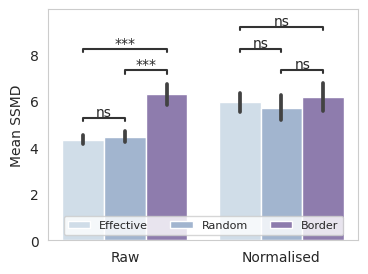

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:3.142e-01 t=1.013e+00
Random vs. Border: t-test independent samples, P_val:9.574e-01 t=5.359e-02
Effective vs. Border: t-test independent samples, P_val:4.699e-01 t=7.261e-01


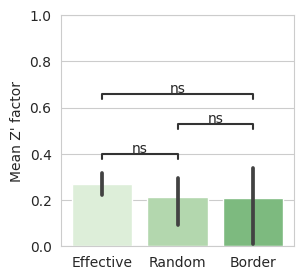

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:4.443e-01 t=7.688e-01
Random vs. Border: t-test independent samples, P_val:2.406e-01 t=-1.182e+00
Effective vs. Border: t-test independent samples, P_val:5.406e-01 t=-6.146e-01


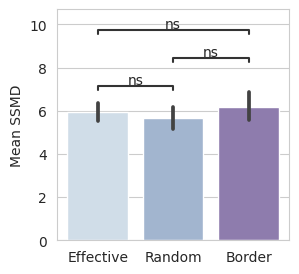

In [4]:
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.04-20220324-10-10.csv'
fig_name = "bowl-10-10-0.04-stdev-10"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=0.9, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

util.plotting_z_scores_norm(screening_scores_data_filename, fig_name+"_norm", y_min=0,y_max=1.0, fig_dir=fig_dir)
util.plotting_ssmd_scores_norm(screening_scores_data_filename, fig_name+"_norm",y_max=10.0, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:1.000e-01 t=-1.664e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:7.853e-01 t=2.734e-01
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:7.986e-02 t=-1.775e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:2.392e-17 t=-1.090e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:2.973e-04 t=-3.788e+00
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:5.125e-19 t=-1.179e+01


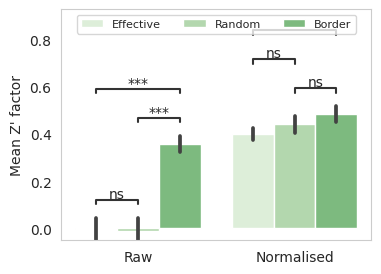

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:9.701e-02 t=-1.680e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:7.189e-01 t=-3.613e-01
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:4.740e-03 t=-2.908e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:1.806e-18 t=-1.150e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:6.148e-04 t=-3.570e+00
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:1.457e-19 t=-1.209e+01


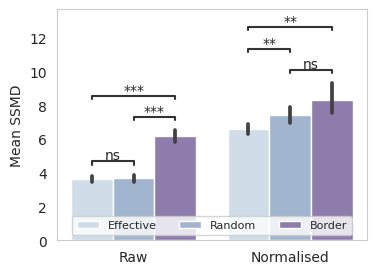

In [5]:
## Not included
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.1-pna-0.99-20220920-stdev-5.csv'
fig_name = "bowl-10-10-0.1-stdev-5"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=0.9, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:2.699e-01 t=-1.111e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:4.103e-01 t=-8.278e-01
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:1.327e-01 t=-1.520e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:7.827e-15 t=-9.589e+00
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:1.544e-03 t=-3.282e+00
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:3.942e-19 t=-1.186e+01


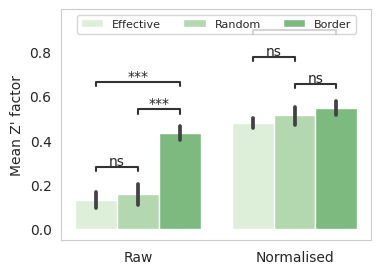

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:2.188e-01 t=-1.240e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:2.103e-01 t=-1.263e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:4.795e-03 t=-2.904e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:1.937e-16 t=-1.042e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:9.110e-04 t=-3.449e+00
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:1.616e-19 t=-1.207e+01


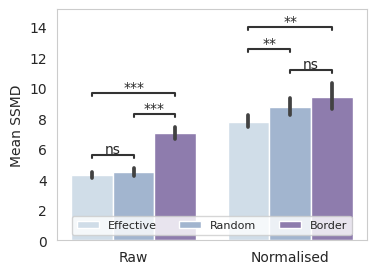

In [6]:
## Not included
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.075-pna-0.99-20220920-stdev-5.csv'
fig_name = "bowl-10-10-0.075-stdev-5"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=0.9, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:4.027e-01 t=-8.413e-01
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:6.431e-01 t=-4.652e-01
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:1.108e-02 t=-2.602e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:3.163e-18 t=-1.137e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:7.405e-04 t=-3.513e+00
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:3.998e-21 t=-1.295e+01


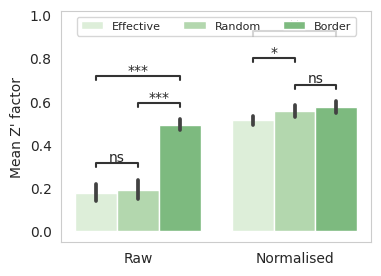

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:4.324e-01 t=-7.891e-01
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:4.686e-01 t=-7.282e-01
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:2.599e-03 t=-3.112e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:1.045e-15 t=-1.004e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:5.418e-04 t=-3.608e+00
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:1.217e-18 t=-1.159e+01


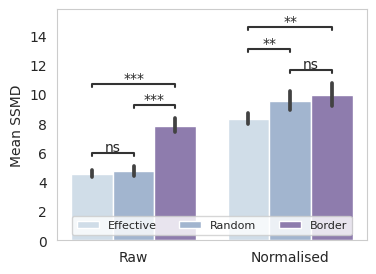

In [7]:
## Not included
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.07-pna-0.99-20220920-stdev-5.csv'
fig_name = "bowl-10-10-0.07-stdev-5"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=0.9, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:9.937e-01 t=-7.863e-03
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:7.186e-01 t=3.617e-01
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:1.665e-01 t=-1.397e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:1.792e-16 t=-1.044e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:1.765e-01 t=-1.364e+00
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:3.123e-15 t=-9.795e+00


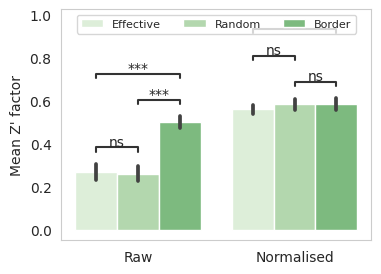

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:8.832e-01 t=1.475e-01
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:8.252e-01 t=-2.215e-01
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:2.863e-02 t=-2.230e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:4.683e-15 t=-9.704e+00
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:6.131e-02 t=-1.899e+00
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:2.042e-16 t=-1.041e+01


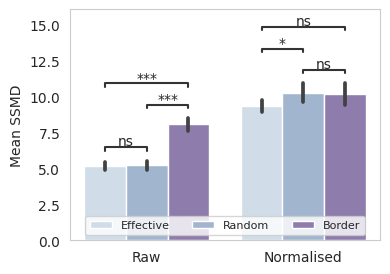

In [8]:
## Not included
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.06-pna-0.99-20220920-stdev-5.csv'
fig_name = "bowl-10-10-0.06-stdev-5"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=0.9, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:6.879e-01 t=-4.032e-01
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:7.592e-01 t=-3.076e-01
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:1.184e-01 t=-1.579e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:2.995e-14 t=-9.287e+00
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:7.643e-02 t=-1.796e+00
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:8.523e-15 t=-9.569e+00


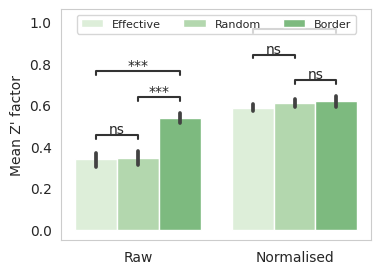

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:4.913e-01 t=-6.915e-01
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:7.742e-01 t=-2.879e-01
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:2.850e-02 t=-2.232e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:2.018e-13 t=-8.860e+00
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:1.890e-02 t=-2.397e+00
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:4.426e-14 t=-9.200e+00


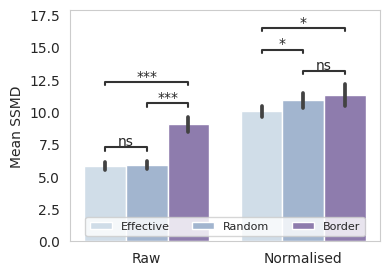

In [9]:
## Not included
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.05-pna-0.99-20220920-stdev-5.csv'
fig_name = "bowl-10-10-0.05-stdev-5"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=0.9, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:4.540e-01 t=7.526e-01
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:2.622e-01 t=1.129e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:7.504e-01 t=-3.193e-01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:3.360e-02 t=-2.163e+00
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:7.456e-01 t=3.256e-01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:5.459e-01 t=-6.066e-01


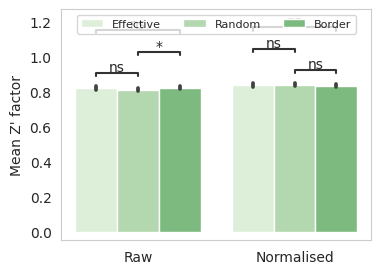

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:8.063e-01 t=2.461e-01
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:1.029e-01 t=1.650e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:9.048e-01 t=1.199e-01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:4.645e-02 t=-2.023e+00
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:7.427e-01 t=3.295e-01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:9.668e-01 t=4.182e-02


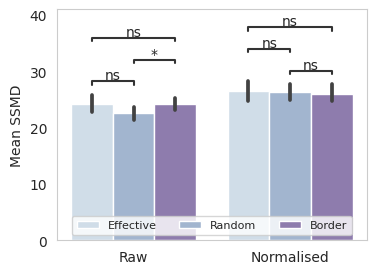

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:7.504e-01 t=-3.193e-01
Random vs. Border: t-test independent samples, P_val:4.540e-01 t=7.526e-01
Effective vs. Border: t-test independent samples, P_val:7.456e-01 t=3.256e-01


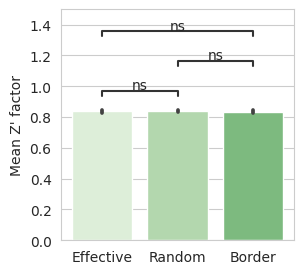

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:9.048e-01 t=1.199e-01
Random vs. Border: t-test independent samples, P_val:8.063e-01 t=2.461e-01
Effective vs. Border: t-test independent samples, P_val:7.427e-01 t=3.295e-01


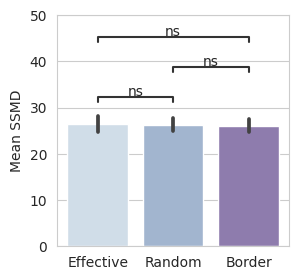

In [10]:
## Currently in Supplement 
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.0-pna-0.99-20220927-stdev-3.csv'
fig_name = "bowl-10-10-0.0-stdev-3"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=0.9, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

util.plotting_z_scores_norm(screening_scores_data_filename, fig_name+"_norm", y_min=0,y_max=1.5, fig_dir=fig_dir)
util.plotting_ssmd_scores_norm(screening_scores_data_filename, fig_name+"_norm",y_max=50.0, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:2.800e-02 t=2.239e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:6.718e-01 t=4.254e-01
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:7.916e-01 t=-2.651e-01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:1.073e-05 t=-4.707e+00
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:1.380e-01 t=1.499e+00
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:8.160e-04 t=-3.483e+00


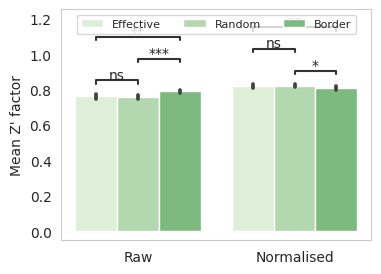

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:4.628e-02 t=2.025e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:5.194e-01 t=6.471e-01
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:4.912e-01 t=6.917e-01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:8.146e-06 t=-4.779e+00
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:3.048e-02 t=2.204e+00
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:7.055e-04 t=-3.528e+00


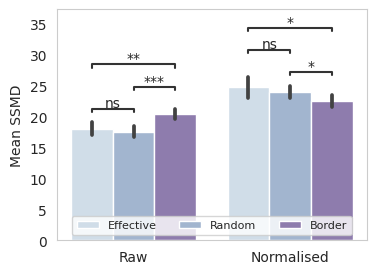

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:7.916e-01 t=-2.651e-01
Random vs. Border: t-test independent samples, P_val:2.800e-02 t=2.239e+00
Effective vs. Border: t-test independent samples, P_val:1.380e-01 t=1.499e+00


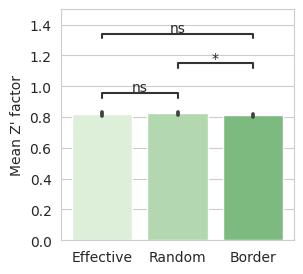

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:4.912e-01 t=6.917e-01
Random vs. Border: t-test independent samples, P_val:4.628e-02 t=2.025e+00
Effective vs. Border: t-test independent samples, P_val:3.048e-02 t=2.204e+00


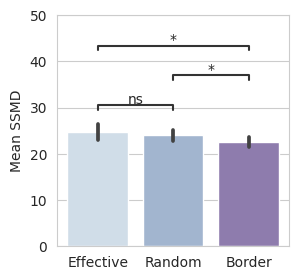

In [11]:
## Currently in Supplement 
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.01-pna-0.99-20220927-stdev-3.csv'
fig_name = "bowl-10-10-0.01-stdev-3"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=0.9, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

util.plotting_z_scores_norm(screening_scores_data_filename, fig_name+"_norm", y_min=0,y_max=1.5, fig_dir=fig_dir)
util.plotting_ssmd_scores_norm(screening_scores_data_filename, fig_name+"_norm",y_max=50.0, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:3.959e-01 t=8.494e-01
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:5.771e-01 t=-5.579e-01
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:1.057e-12 t=-7.240e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:4.101e-110 t=-2.627e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:5.160e-09 t=-5.907e+00
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:6.253e-123 t=-2.836e+01


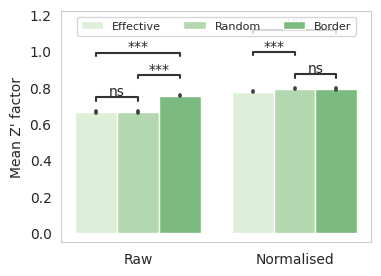

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:7.075e-01 t=3.753e-01
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:2.413e-01 t=-1.173e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:3.073e-14 t=-7.737e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:4.326e-114 t=-2.692e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:5.691e-11 t=-6.643e+00
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:5.269e-128 t=-2.919e+01


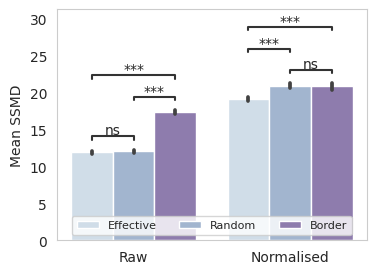

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:1.057e-12 t=-7.240e+00
Random vs. Border: t-test independent samples, P_val:3.959e-01 t=8.494e-01
Effective vs. Border: t-test independent samples, P_val:5.160e-09 t=-5.907e+00


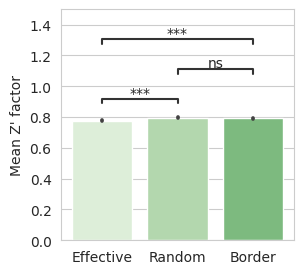

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:3.073e-14 t=-7.737e+00
Random vs. Border: t-test independent samples, P_val:7.075e-01 t=3.753e-01
Effective vs. Border: t-test independent samples, P_val:5.691e-11 t=-6.643e+00


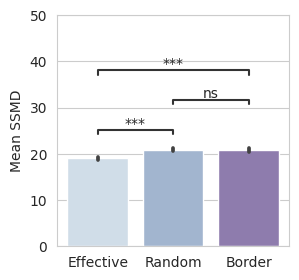

In [12]:
## Currently in Supplement 
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.02-pna-0.99-20220927-stdev-3.csv'
fig_name = "bowl-10-10-0.02-stdev-3"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=0.9, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

util.plotting_z_scores_norm(screening_scores_data_filename, fig_name+"_norm", y_min=0,y_max=1.5, fig_dir=fig_dir)
util.plotting_ssmd_scores_norm(screening_scores_data_filename, fig_name+"_norm",y_max=50.0, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:6.961e-01 t=-3.907e-01
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:2.101e-01 t=-1.254e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:2.368e-19 t=-9.231e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:8.431e-139 t=-3.095e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:3.960e-18 t=-8.892e+00
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:4.943e-164 t=-3.511e+01


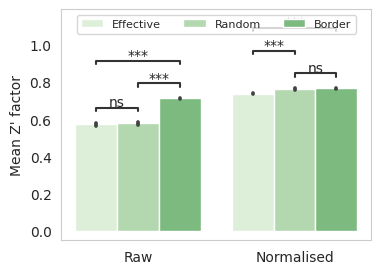

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:3.706e-01 t=-8.959e-01
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:1.703e-01 t=-1.373e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:3.944e-23 t=-1.022e+01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:5.007e-143 t=-3.164e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:2.209e-21 t=-9.772e+00
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:2.212e-158 t=-3.417e+01


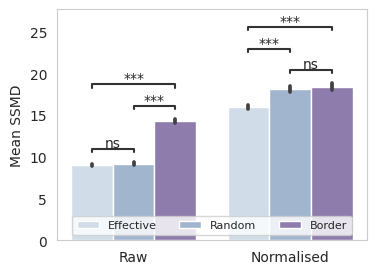

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:2.368e-19 t=-9.231e+00
Random vs. Border: t-test independent samples, P_val:6.961e-01 t=-3.907e-01
Effective vs. Border: t-test independent samples, P_val:3.960e-18 t=-8.892e+00


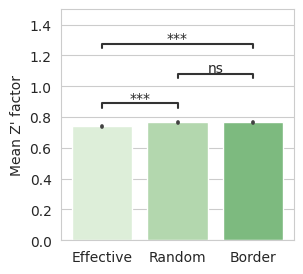

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:3.944e-23 t=-1.022e+01
Random vs. Border: t-test independent samples, P_val:3.706e-01 t=-8.959e-01
Effective vs. Border: t-test independent samples, P_val:2.209e-21 t=-9.772e+00


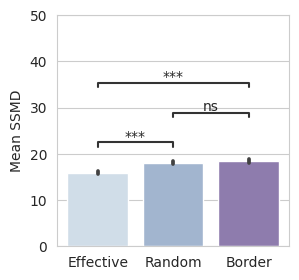

In [13]:
## Currently in Supplement 
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.03-pna-0.99-20220927-stdev-3.csv'
fig_name = "bowl-10-10-0.03-stdev-3"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=0.9, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

util.plotting_z_scores_norm(screening_scores_data_filename, fig_name+"_norm", y_min=0,y_max=1.5, fig_dir=fig_dir)
util.plotting_ssmd_scores_norm(screening_scores_data_filename, fig_name+"_norm",y_max=50.0, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:1.521e-01 t=-1.434e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:4.956e-02 t=-1.967e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:3.232e-34 t=-1.279e+01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:2.083e-158 t=-3.418e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:8.586e-35 t=-1.292e+01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:9.945e-203 t=-4.172e+01


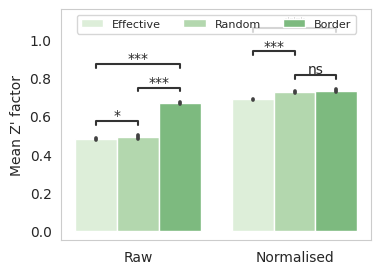

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:2.351e-02 t=-2.269e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:7.879e-03 t=-2.664e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:1.049e-38 t=-1.374e+01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:1.141e-160 t=-3.455e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:9.486e-36 t=-1.312e+01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:1.755e-188 t=-3.925e+01


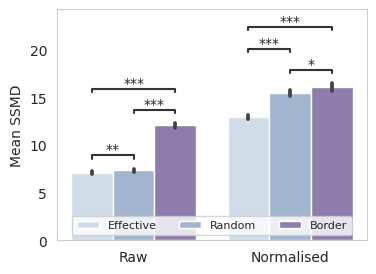

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:3.232e-34 t=-1.279e+01
Random vs. Border: t-test independent samples, P_val:1.521e-01 t=-1.434e+00
Effective vs. Border: t-test independent samples, P_val:8.586e-35 t=-1.292e+01


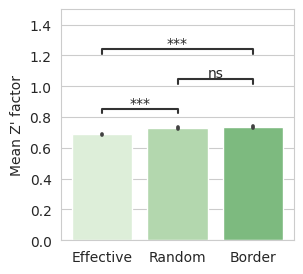

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:1.049e-38 t=-1.374e+01
Random vs. Border: t-test independent samples, P_val:2.351e-02 t=-2.269e+00
Effective vs. Border: t-test independent samples, P_val:9.486e-36 t=-1.312e+01


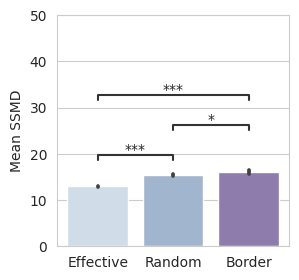

In [14]:
## Currently in Supplement 
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.04-pna-0.99-20220927-stdev-3.csv'
fig_name = "bowl-10-10-0.04-stdev-3"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=0.9, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

util.plotting_z_scores_norm(screening_scores_data_filename, fig_name+"_norm", y_min=0,y_max=1.5, fig_dir=fig_dir)
util.plotting_ssmd_scores_norm(screening_scores_data_filename, fig_name+"_norm",y_max=50.0, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:1.942e-05 t=-4.297e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:1.605e-01 t=-1.405e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:1.163e-26 t=-1.109e+01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:6.442e-170 t=-3.610e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:3.076e-39 t=-1.385e+01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:4.635e-217 t=-4.426e+01


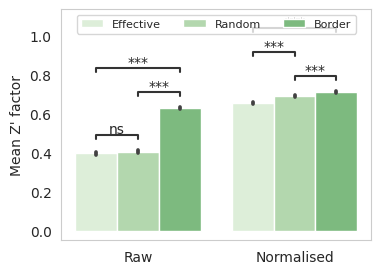

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:6.026e-08 t=-5.470e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:1.989e-02 t=-2.333e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:8.292e-35 t=-1.292e+01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:5.518e-162 t=-3.477e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:2.710e-39 t=-1.386e+01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:2.320e-181 t=-3.803e+01


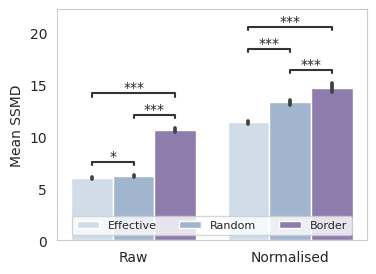

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:1.163e-26 t=-1.109e+01
Random vs. Border: t-test independent samples, P_val:1.942e-05 t=-4.297e+00
Effective vs. Border: t-test independent samples, P_val:3.076e-39 t=-1.385e+01


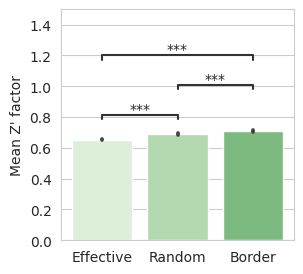

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:8.292e-35 t=-1.292e+01
Random vs. Border: t-test independent samples, P_val:6.026e-08 t=-5.470e+00
Effective vs. Border: t-test independent samples, P_val:2.710e-39 t=-1.386e+01


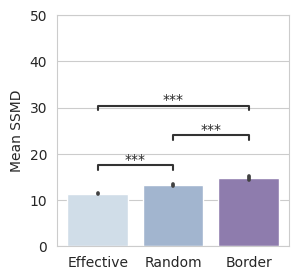

In [15]:
## Currently in Supplement 
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.05-pna-0.99-20220927-stdev-3.csv'
fig_name = "bowl-10-10-0.05-stdev-3"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=0.9, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

util.plotting_z_scores_norm(screening_scores_data_filename, fig_name+"_norm", y_min=0,y_max=1.5, fig_dir=fig_dir)
util.plotting_ssmd_scores_norm(screening_scores_data_filename, fig_name+"_norm",y_max=50.0, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:5.104e-10 t=-6.294e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:3.936e-02 t=-2.064e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:3.686e-27 t=-1.120e+01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:4.170e-176 t=-3.714e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:2.042e-55 t=-1.698e+01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:1.792e-222 t=-4.524e+01


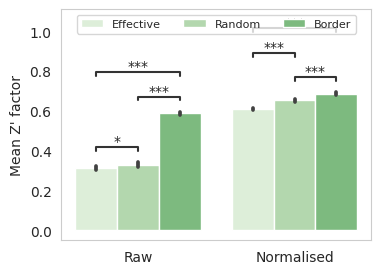

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:2.749e-13 t=-7.432e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:5.277e-03 t=-2.797e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:4.392e-37 t=-1.340e+01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:1.307e-174 t=-3.689e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:4.596e-50 t=-1.598e+01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:2.503e-200 t=-4.130e+01


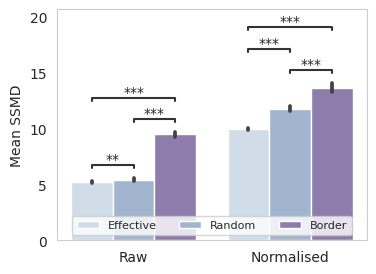

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:3.686e-27 t=-1.120e+01
Random vs. Border: t-test independent samples, P_val:5.104e-10 t=-6.294e+00
Effective vs. Border: t-test independent samples, P_val:2.042e-55 t=-1.698e+01


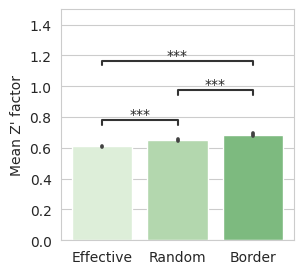

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:4.392e-37 t=-1.340e+01
Random vs. Border: t-test independent samples, P_val:2.749e-13 t=-7.432e+00
Effective vs. Border: t-test independent samples, P_val:4.596e-50 t=-1.598e+01


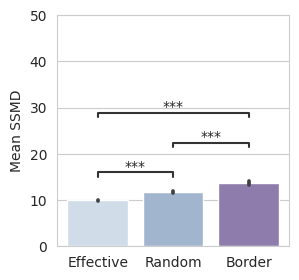

In [16]:
## Currently in Supplement 
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.06-pna-0.99-20220927-stdev-3.csv'
fig_name = "bowl-10-10-0.06-stdev-3"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=0.9, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

util.plotting_z_scores_norm(screening_scores_data_filename, fig_name+"_norm", y_min=0,y_max=1.5, fig_dir=fig_dir)
util.plotting_ssmd_scores_norm(screening_scores_data_filename, fig_name+"_norm",y_max=50.0, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:5.787e-02 t=-1.925e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:8.295e-01 t=-2.161e-01
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:5.676e-03 t=-2.845e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:5.692e-19 t=-1.177e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:3.942e-05 t=-4.359e+00
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:9.005e-22 t=-1.331e+01


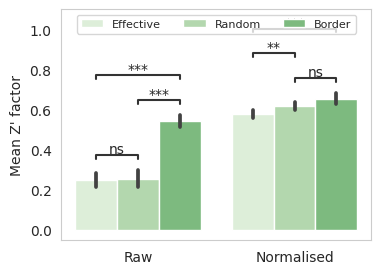

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:1.603e-02 t=-2.462e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:5.829e-01 t=-5.515e-01
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:3.698e-04 t=-3.723e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:1.599e-18 t=-1.153e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:5.831e-06 t=-4.865e+00
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:4.988e-20 t=-1.234e+01


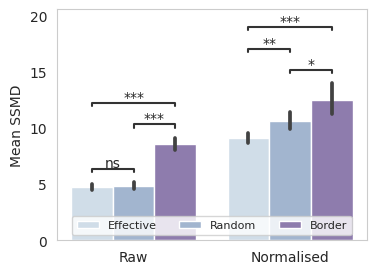

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:5.676e-03 t=-2.845e+00
Random vs. Border: t-test independent samples, P_val:5.787e-02 t=-1.925e+00
Effective vs. Border: t-test independent samples, P_val:3.942e-05 t=-4.359e+00


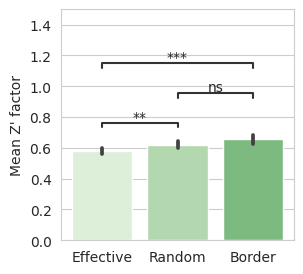

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:3.698e-04 t=-3.723e+00
Random vs. Border: t-test independent samples, P_val:1.603e-02 t=-2.462e+00
Effective vs. Border: t-test independent samples, P_val:5.831e-06 t=-4.865e+00


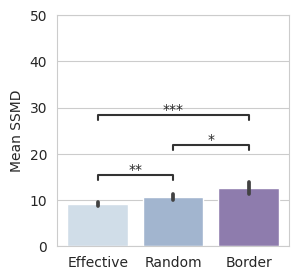

In [17]:
## Currently in Supplement 
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.07-pna-0.99-20220920-stdev-3.csv'
fig_name = "bowl-10-10-0.07-stdev-3"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=0.9, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

util.plotting_z_scores_norm(screening_scores_data_filename, fig_name+"_norm", y_min=0,y_max=1.5, fig_dir=fig_dir)
util.plotting_ssmd_scores_norm(screening_scores_data_filename, fig_name+"_norm",y_max=50.0, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:2.382e-09 t=-6.039e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:6.442e-02 t=-1.852e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:7.369e-22 t=-9.896e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:1.991e-183 t=-3.838e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:4.318e-57 t=-1.728e+01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:1.427e-233 t=-4.727e+01


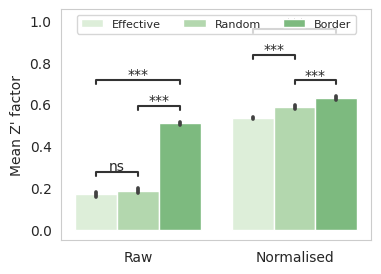

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:3.931e-11 t=-6.700e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:1.233e-02 t=-2.508e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:1.494e-35 t=-1.308e+01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:5.084e-176 t=-3.712e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:2.651e-46 t=-1.526e+01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:2.418e-200 t=-4.130e+01


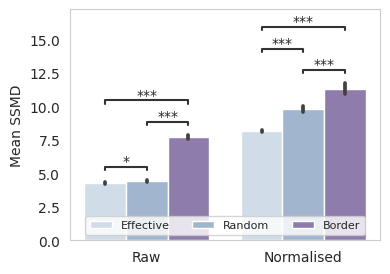

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:7.369e-22 t=-9.896e+00
Random vs. Border: t-test independent samples, P_val:2.382e-09 t=-6.039e+00
Effective vs. Border: t-test independent samples, P_val:4.318e-57 t=-1.728e+01


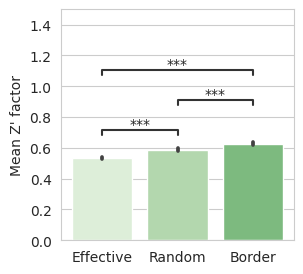

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:1.494e-35 t=-1.308e+01
Random vs. Border: t-test independent samples, P_val:3.931e-11 t=-6.700e+00
Effective vs. Border: t-test independent samples, P_val:2.651e-46 t=-1.526e+01


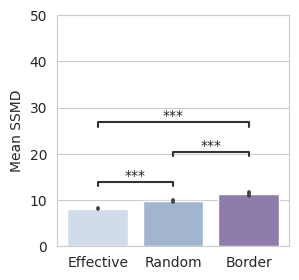

In [18]:
## Currently in Supplement 
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.08-pna-0.99-20220927-stdev-3.csv'
fig_name = "bowl-10-10-0.08-stdev-3"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=0.9, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

util.plotting_z_scores_norm(screening_scores_data_filename, fig_name+"_norm", y_min=0,y_max=1.5, fig_dir=fig_dir)
util.plotting_ssmd_scores_norm(screening_scores_data_filename, fig_name+"_norm",y_max=50.0, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:7.759e-10 t=-6.225e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:4.639e-02 t=-1.995e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:3.795e-23 t=-1.023e+01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:6.517e-175 t=-3.694e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:1.227e-56 t=-1.720e+01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:2.544e-227 t=-4.612e+01


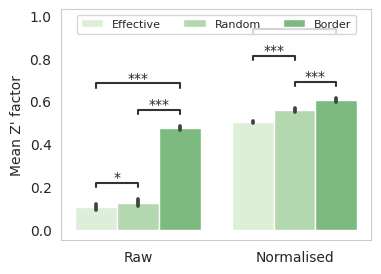

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:4.941e-12 t=-7.014e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:4.953e-03 t=-2.818e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:7.911e-36 t=-1.314e+01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:5.638e-173 t=-3.661e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:1.779e-47 t=-1.548e+01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:8.645e-198 t=-4.086e+01


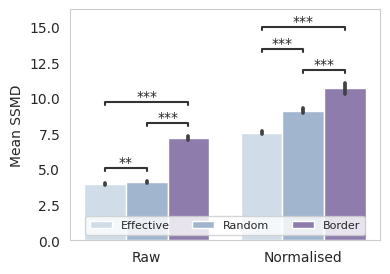

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:3.795e-23 t=-1.023e+01
Random vs. Border: t-test independent samples, P_val:7.759e-10 t=-6.225e+00
Effective vs. Border: t-test independent samples, P_val:1.227e-56 t=-1.720e+01


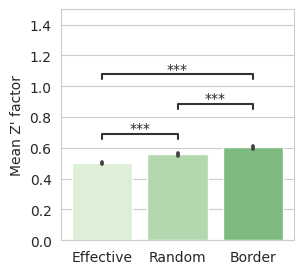

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:7.911e-36 t=-1.314e+01
Random vs. Border: t-test independent samples, P_val:4.941e-12 t=-7.014e+00
Effective vs. Border: t-test independent samples, P_val:1.779e-47 t=-1.548e+01


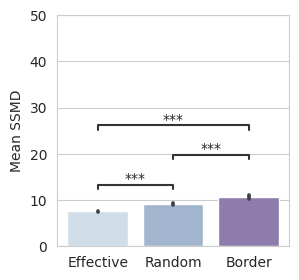

In [19]:
## Currently in Supplement 
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.09-pna-0.99-20220927-stdev-3.csv'
fig_name = "bowl-10-10-0.09-stdev-3"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=0.9, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

util.plotting_z_scores_norm(screening_scores_data_filename, fig_name+"_norm", y_min=0,y_max=1.5, fig_dir=fig_dir)
util.plotting_ssmd_scores_norm(screening_scores_data_filename, fig_name+"_norm",y_max=50.0, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:8.801e-13 t=-7.266e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:7.004e-02 t=-1.814e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:1.055e-16 t=-8.483e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:4.336e-184 t=-3.850e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:6.355e-60 t=-1.780e+01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:6.489e-234 t=-4.734e+01


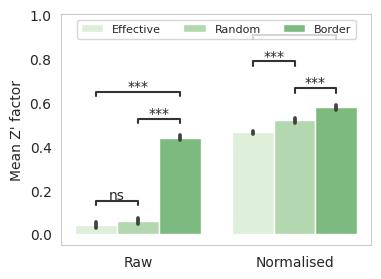

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:1.200e-13 t=-7.549e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:7.924e-03 t=-2.662e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:1.657e-34 t=-1.285e+01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:2.682e-171 t=-3.633e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:7.332e-43 t=-1.458e+01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:7.107e-194 t=-4.018e+01


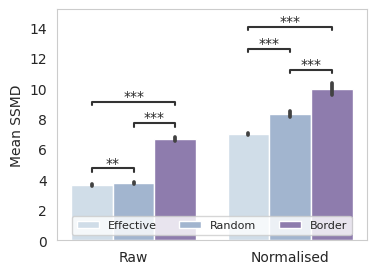

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:1.055e-16 t=-8.483e+00
Random vs. Border: t-test independent samples, P_val:8.801e-13 t=-7.266e+00
Effective vs. Border: t-test independent samples, P_val:6.355e-60 t=-1.780e+01


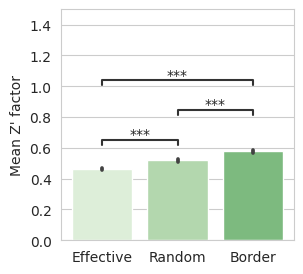

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:1.657e-34 t=-1.285e+01
Random vs. Border: t-test independent samples, P_val:1.200e-13 t=-7.549e+00
Effective vs. Border: t-test independent samples, P_val:7.332e-43 t=-1.458e+01


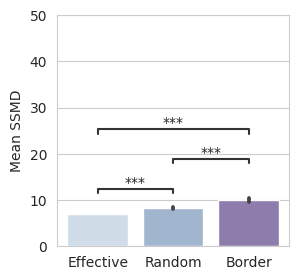

In [20]:
## Currently in Supplement 
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.1-pna-0.99-20220927-stdev-3.csv'
fig_name = "bowl-10-10-0.1-stdev-3"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=0.9, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

util.plotting_z_scores_norm(screening_scores_data_filename, fig_name+"_norm", y_min=0,y_max=1.5, fig_dir=fig_dir)
util.plotting_ssmd_scores_norm(screening_scores_data_filename, fig_name+"_norm",y_max=50.0, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:3.195e-11 t=-6.732e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:9.194e-02 t=-1.687e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:1.728e-15 t=-8.123e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:1.684e-180 t=-3.788e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:6.857e-57 t=-1.725e+01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:2.396e-234 t=-4.742e+01


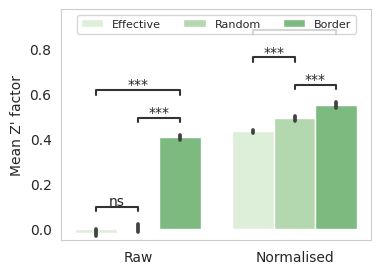

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:2.486e-13 t=-7.447e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:1.094e-02 t=-2.550e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:2.047e-36 t=-1.326e+01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:2.550e-180 t=-3.785e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:8.353e-40 t=-1.396e+01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:3.994e-204 t=-4.197e+01


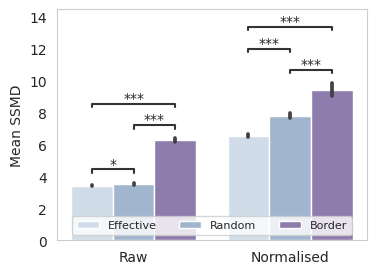

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:1.728e-15 t=-8.123e+00
Random vs. Border: t-test independent samples, P_val:3.195e-11 t=-6.732e+00
Effective vs. Border: t-test independent samples, P_val:6.857e-57 t=-1.725e+01


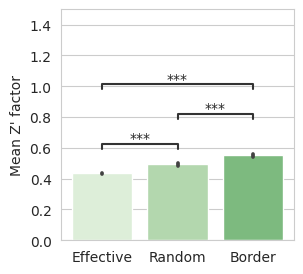

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:2.047e-36 t=-1.326e+01
Random vs. Border: t-test independent samples, P_val:2.486e-13 t=-7.447e+00
Effective vs. Border: t-test independent samples, P_val:8.353e-40 t=-1.396e+01


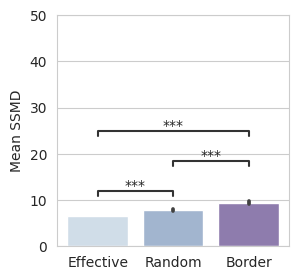

In [21]:
## Currently in Supplement 
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.11-pna-0.99-20220927-stdev-3.csv'
fig_name = "bowl-10-10-0.11-stdev-3"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=0.9, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

util.plotting_z_scores_norm(screening_scores_data_filename, fig_name+"_norm", y_min=0,y_max=1.5, fig_dir=fig_dir)
util.plotting_ssmd_scores_norm(screening_scores_data_filename, fig_name+"_norm",y_max=50.0, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:6.520e-10 t=-6.254e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:7.226e-02 t=-1.800e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:2.487e-01 t=-1.154e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:3.119e-176 t=-3.716e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:1.913e-53 t=-1.661e+01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:1.916e-229 t=-4.651e+01


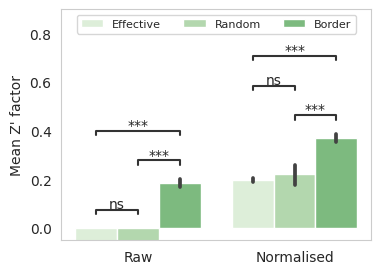

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:1.182e-13 t=-7.551e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:8.534e-03 t=-2.637e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:7.199e-23 t=-1.016e+01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:6.519e-175 t=-3.694e+01
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:1.856e-31 t=-1.219e+01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:1.573e-195 t=-4.046e+01


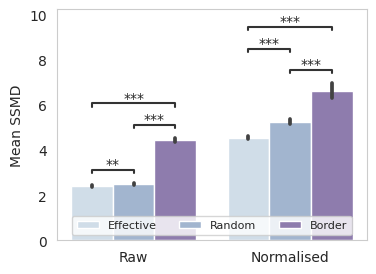

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:2.487e-01 t=-1.154e+00
Random vs. Border: t-test independent samples, P_val:6.520e-10 t=-6.254e+00
Effective vs. Border: t-test independent samples, P_val:1.913e-53 t=-1.661e+01


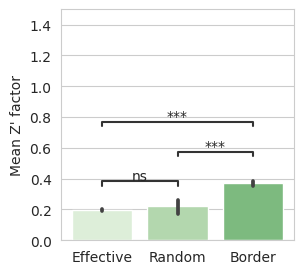

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Effective vs. Random: t-test independent samples, P_val:7.199e-23 t=-1.016e+01
Random vs. Border: t-test independent samples, P_val:1.182e-13 t=-7.551e+00
Effective vs. Border: t-test independent samples, P_val:1.856e-31 t=-1.219e+01


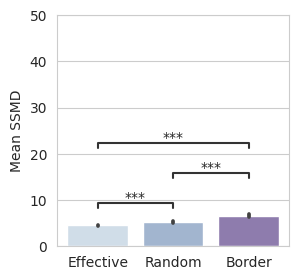

In [22]:
## Currently in Supplement 
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.2-pna-0.99-20220928-stdev-3.csv'
fig_name = "bowl-10-10-0.2-stdev-3"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=0.9, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

util.plotting_z_scores_norm(screening_scores_data_filename, fig_name+"_norm", y_min=0,y_max=1.5, fig_dir=fig_dir)
util.plotting_ssmd_scores_norm(screening_scores_data_filename, fig_name+"_norm",y_max=50.0, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:2.371e-01 t=-1.191e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:7.102e-01 t=3.730e-01
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:1.658e-01 t=1.399e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:3.220e-09 t=-6.677e+00
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:9.718e-01 t=3.552e-02
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:3.522e-11 t=-7.704e+00


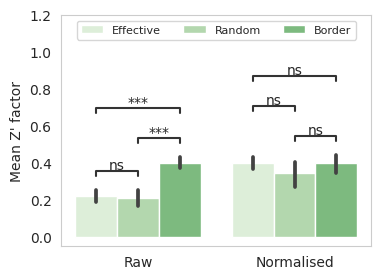

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:2.522e-01 t=-1.154e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:9.055e-01 t=-1.191e-01
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:4.821e-01 t=7.063e-01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:5.418e-08 t=-6.018e+00
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:5.241e-01 t=-6.399e-01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:1.532e-10 t=-7.372e+00


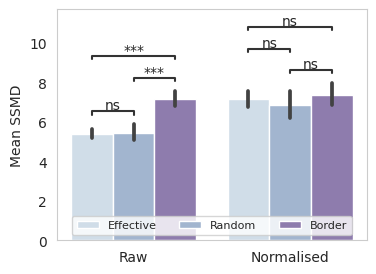

In [23]:
## Not included
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.03-20220324-10-10-lose-rows.csv'
fig_name = "bowl-10-10-0.03"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.05,y_max=1.2, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:2.478e-01 t=-1.165e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:3.172e-01 t=-1.007e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:2.390e-01 t=1.187e+00
Raw_Random vs. Raw_Border: t-test independent samples, P_val:2.607e-13 t=-8.803e+00
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:8.585e-01 t=-1.789e-01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:9.447e-16 t=-1.007e+01


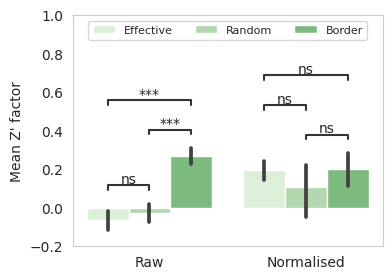

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-04 < p <= 1.00e-02
     ***: p <= 1.00e-04

Normalised_Random vs. Normalised_Border: t-test independent samples, P_val:1.619e-01 t=-1.412e+00
Raw_Effective vs. Raw_Random: t-test independent samples, P_val:1.246e-01 t=-1.553e+00
Normalised_Effective vs. Normalised_Random: t-test independent samples, P_val:4.164e-01 t=8.170e-01
Raw_Random vs. Raw_Border: t-test independent samples, P_val:1.233e-13 t=-8.970e+00
Normalised_Effective vs. Normalised_Border: t-test independent samples, P_val:4.101e-01 t=-8.282e-01
Raw_Effective vs. Raw_Border: t-test independent samples, P_val:1.732e-17 t=-1.098e+01


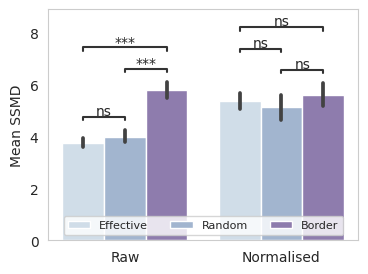

In [24]:
## Not included
screening_scores_data_filename = data_dir+'screening_scores_data-10-10-0.05-20220324-10-10-lose-rows.csv'
fig_name = "bowl-10-10-0.05"

util.plotting_z_scores(screening_scores_data_filename, fig_name, y_min=-0.2,y_max=1.0, fig_dir=fig_dir)
util.plotting_ssmd_scores(screening_scores_data_filename, fig_name, fig_dir=fig_dir)

# Residuals

In [25]:
## Loading data

#residuals_filename = 'screening-residuals-10-10-0.125-20210930.csv'
#residuals_filename = 'screening-residuals-10-20-0.075-20211001.csv'
#residuals_filename = 'screening-residuals-10-20-0.085-20220307.csv'

#residuals_filename = 'screening-residuals-10-20-0.05-20220323-lose-rows.csv'

# Included in the paper as strong bowl-shaped 10-20
residuals_filename = data_dir+'screening-residuals-10-20-0.05-20220323-test.csv'

#residuals_filename = 'screening-residuals-10-10-0.05-20220324-10-10.csv'

#residuals_filename = 'screening-residuals-10-10-0.04-20220324-10-10-lose-rows.csv'

print(residuals_filename)

screening_residuals_df = pd.read_csv(residuals_filename)

screening_residuals_df.head()

generated-data/screening/screening-residuals-10-20-0.05-20220323-test.csv


,layout,error_type,error,lost_rows,neg_control_mean,pos_control_mean,neg_stdev,pos_stdev,comp_id,true_residuals,expected_result,obtained_result,plate_id
0,PLAID,bowl-nl,0.05,0,101.798983,35.274889,3.825955,7.104129,162.0,448.892146,97.407342,118.594417,1
1,PLAID,bowl-nl,0.05,0,101.798983,35.274889,3.825955,7.104129,203.0,0.069892,45.522870,45.258499,1
2,PLAID,bowl-nl,0.05,0,101.798983,35.274889,3.825955,7.104129,280.0,230.638858,94.132213,109.319012,1
3,PLAID,bowl-nl,0.05,0,101.798983,35.274889,3.825955,7.104129,15.0,247.882501,105.179748,120.924032,1
4,PLAID,bowl-nl,0.05,0,101.798983,35.274889,3.825955,7.104129,77.0,133.636954,100.663556,112.223701,1


In [26]:

print(screening_residuals_df[screening_residuals_df['layout']=='PLAID'].describe())

print(screening_residuals_df[screening_residuals_df['layout']=='RANDOM'].describe(),"\n")

print("Border")
print(screening_residuals_df[screening_residuals_df['layout']=='BORDER'].describe())

#screening_residuals_df[screening_residuals_df['layout']=='BORDER'].head()


              error  lost_rows  neg_control_mean  pos_control_mean  \
count  1.232000e+04    12320.0      12320.000000      12320.000000   
mean   5.000000e-02        0.0         99.934512         35.726667   
std    6.939176e-18        0.0          1.122943          1.719832   
min    5.000000e-02        0.0         97.580249         31.768018   
25%    5.000000e-02        0.0         99.195940         34.468934   
50%    5.000000e-02        0.0        100.127459         35.584099   
75%    5.000000e-02        0.0        100.710718         36.807233   
max    5.000000e-02        0.0        102.341215         40.581859   

          neg_stdev     pos_stdev       comp_id  true_residuals  \
count  12320.000000  12320.000000  12320.000000    1.232000e+04   
mean       4.690098      5.693835    153.152597    7.247909e+01   
std        0.679470      1.206717     86.837966    1.085536e+02   
min        3.641936      3.355214      1.000000    2.915642e-08   
25%        4.185819      4.785798 

In [27]:
rand_results_array = screening_residuals_df.loc[(screening_residuals_df.layout=="RANDOM") & (screening_residuals_df.lost_rows == 0)].true_residuals
plaid_results_array = screening_residuals_df.loc[(screening_residuals_df.layout=="PLAID") & (screening_residuals_df.lost_rows == 0)].true_residuals
border_results_array = screening_residuals_df.loc[(screening_residuals_df.layout=="BORDER") & (screening_residuals_df.lost_rows == 0)].true_residuals


In [28]:
print("Variance of PLAID layouts:", statistics.variance(plaid_results_array))
print("Variance of RANDOM layouts:", statistics.variance(rand_results_array))
print("Variance of BORDER layouts:", statistics.variance(border_results_array),"\n")


print("PLAID vs RANDOM (same variance):", stats.ttest_ind(plaid_results_array,rand_results_array,equal_var = True))
print("PLAID vs RANDOM:", stats.ttest_ind(plaid_results_array,rand_results_array,equal_var = False))

print("RANDOM vs BORDER (same variance):", stats.ttest_ind(border_results_array,rand_results_array,equal_var = True))
print("RANDOM vs BORDER:", stats.ttest_ind(border_results_array,rand_results_array,equal_var = False))

print("PLAID vs BORDER:", stats.ttest_ind(plaid_results_array,border_results_array,equal_var = False),"\n")

print("One way ANOVA:",stats.f_oneway(rand_results_array,plaid_results_array,border_results_array))

Variance of PLAID layouts: 11783.891501475428
Variance of RANDOM layouts: 45635.481439065275
Variance of BORDER layouts: 190800.4558696326 

PLAID vs RANDOM (same variance): Ttest_indResult(statistic=-20.1111651602349, pvalue=3.0684099253660333e-89)
PLAID vs RANDOM: Ttest_indResult(statistic=-20.1111651602349, pvalue=5.3999067276732676e-89)
RANDOM vs BORDER (same variance): Ttest_indResult(statistic=55.028205453724986, pvalue=0.0)
RANDOM vs BORDER: Ttest_indResult(statistic=55.028205453724986, pvalue=0.0)
PLAID vs BORDER: Ttest_indResult(statistic=-70.15515465220399, pvalue=0.0) 

One way ANOVA: F_onewayResult(statistic=3497.393617731617, pvalue=0.0)


In [29]:
screen_all_rows = screening_residuals_df[(screening_residuals_df['lost_rows']<1) ]

rand_results_array = screen_all_rows.true_residuals[screen_all_rows.layout=="RANDOM"]
plaid_results_array = screen_all_rows.true_residuals[screen_all_rows.layout=="PLAID"]
border_results_array = screen_all_rows.true_residuals[screen_all_rows.layout=="BORDER"]

print("Variance of PLAID layouts:", statistics.variance(plaid_results_array))
print("Variance of RANDOM layouts:", statistics.variance(rand_results_array))
print("Variance of BORDER layouts:", statistics.variance(border_results_array),"\n")

print("PLAID vs RANDOM (same variance):", stats.ttest_ind(plaid_results_array,rand_results_array,equal_var = True))
print("PLAID vs RANDOM:", stats.ttest_ind(plaid_results_array,rand_results_array,equal_var = False))

print("RANDOM vs BORDER:", stats.ttest_ind(border_results_array,rand_results_array,equal_var = False))

print("PLAID vs BORDER:", stats.ttest_ind(plaid_results_array,border_results_array,equal_var = False),"\n")

print("One way ANOVA:",stats.f_oneway(rand_results_array,plaid_results_array,border_results_array))

Variance of PLAID layouts: 11783.891501475428
Variance of RANDOM layouts: 45635.481439065275
Variance of BORDER layouts: 190800.4558696326 

PLAID vs RANDOM (same variance): Ttest_indResult(statistic=-20.1111651602349, pvalue=3.0684099253660333e-89)
PLAID vs RANDOM: Ttest_indResult(statistic=-20.1111651602349, pvalue=5.3999067276732676e-89)
RANDOM vs BORDER: Ttest_indResult(statistic=55.028205453724986, pvalue=0.0)
PLAID vs BORDER: Ttest_indResult(statistic=-70.15515465220399, pvalue=0.0) 

One way ANOVA: F_onewayResult(statistic=3497.393617731617, pvalue=0.0)


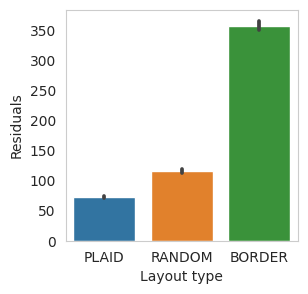

In [30]:
## Not included (old figure)
fig, ax = plt.subplots(figsize=(3, 3))

ax = sns.barplot(x="layout", y="true_residuals", data=screen_all_rows, order=["PLAID", "RANDOM", "BORDER"])

ax.set(xlabel='Layout type', ylabel='Residuals')

plt.show()


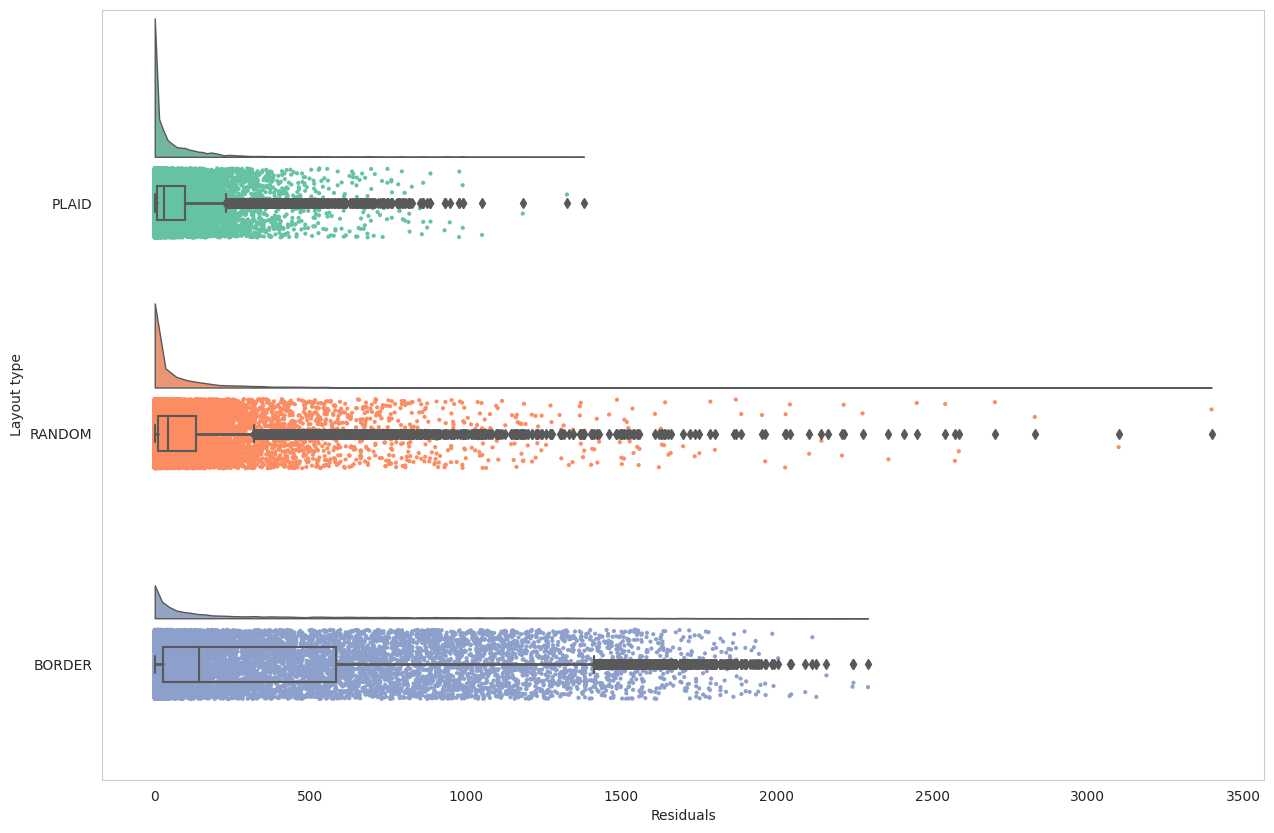

In [31]:
# Rain plot
#temp_half = residuals_df#[(residuals_df['MSE']!=np.inf) & (residuals_df['rows lost']<=1) & (residuals_df['E']>20) & (residuals_df['E']<100) ]
#temp_half.loc[(temp_half['layout']=='PLAID') & (temp_half["MSE"]>0.688),"MSE"] = 0.1

fig, ax = plt.subplots(figsize=(15, 10))

#ax = sns.barplot(x="layout", y="MSE", data=temp_half, order=["PLAID", "RANDOM"])

#sns.barplot(x = "group", y = "score", data = df, capsize= .1)
pal = sns.color_palette(n_colors=1)

#ax=pt.half_violinplot( x = "MSE", y = "layout", data = temp_half, palette = pal, bw = .2, cut = 0.,
 #                     scale = "area", width = .6, inner = None, orient = ort, order=["PLAID", "RANDOM"])

dx = "true_residuals"; dy = "layout"; ort = "h"; pal = "Set2"; sigma = 0.01
#f, ax = plt.subplots(figsize=(7, 5))

ax = pt.RainCloud(x = "layout", y = "true_residuals", data = screen_all_rows, palette = pal, bw = sigma,
                 width_viol = 1.2, ax = ax, orient = ort, order=["PLAID", "RANDOM", "BORDER"], jitter = 0.15)

#ax = sns.violinplot(x="MSE", y="layout", data=temp_half, order=["PLAID", "RANDOM"])
#ax = sns.stripplot(x="MSE", y="layout", data=temp_half,morder=["PLAID", "RANDOM"], jitter=0.3)

ax.set(xlabel='Residuals', ylabel='Layout type')

plt.show()

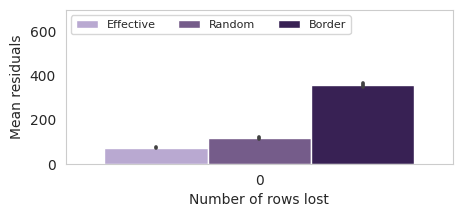

In [32]:
## Plot residuals for different amounts of rows lost ##

screening_residuals_df.loc[(screening_residuals_df['layout'] == "RANDOM"), 'layout'] = "Random"
screening_residuals_df.loc[(screening_residuals_df['layout'] == "BORDER"), 'layout'] = "Border"
screening_residuals_df.loc[(screening_residuals_df['layout'] == "PLAID"), 'layout'] = "Effective"

sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax = plt.subplots(figsize=(5, 2))

palette = ["#b7a2d8", "#765591", "#37185d"] #Dark purple
ax.set(ylim=(0,699))
ax = sns.barplot(x="lost_rows", y="true_residuals", hue="layout", data=screening_residuals_df, palette=palette)

plt.xlabel("Number of rows lost", fontsize = 10)
plt.ylabel("Mean residuals", fontsize = 10)
plt.legend(ncol=3, loc="upper left", fontsize = 8)

plt.show()


In [33]:
fig.savefig("screening-residuals-10-10-0.03-bowl-20220324.png",bbox_inches='tight',dpi=1200)


## Data Plots

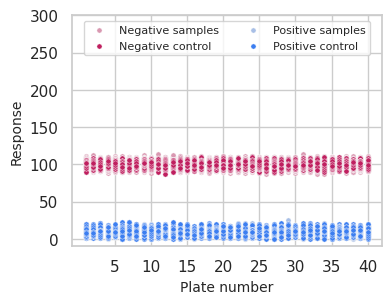

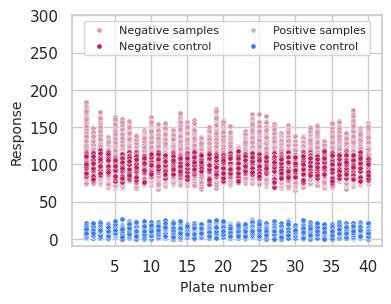

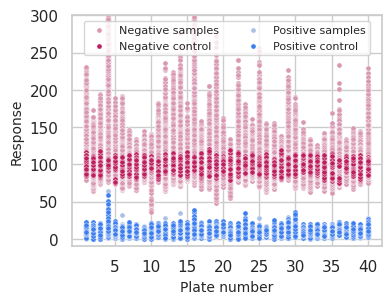

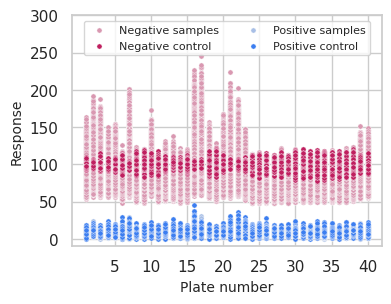

In [34]:
# Manuscript Figure 3 a, b, c
fig_name = "0.06-10-10-0.99-stdev-3-4"
residuals_filename = data_dir+'screening-residuals-10-10-0.06-pna-0.99-20221102-stdev-3-4.csv'

util.plot_screening_plates(residuals_filename, fig_name=fig_name, fig_dir=fig_dir)

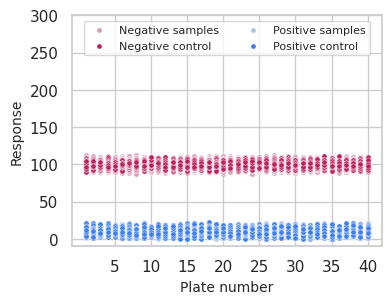

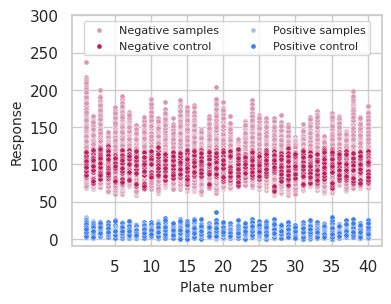

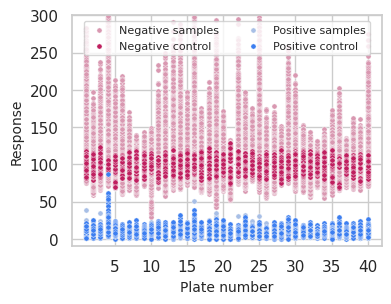

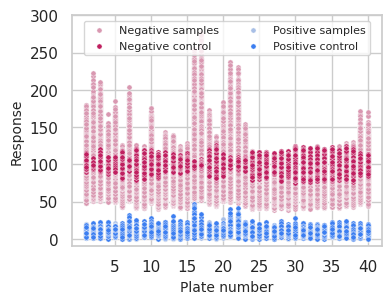

In [35]:
# Supplement Figure 20?
fig_name = "0.08-10-10-0.99-stdev-3-4"
residuals_filename = data_dir+'screening-residuals-10-10-0.08-pna-0.99-20221014-stdev-3-4.csv'

util.plot_screening_plates(residuals_filename, fig_name=fig_name, fig_dir=fig_dir)

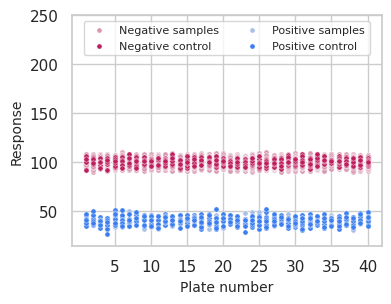

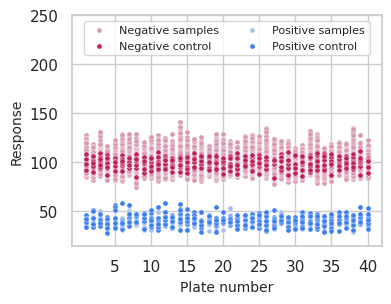

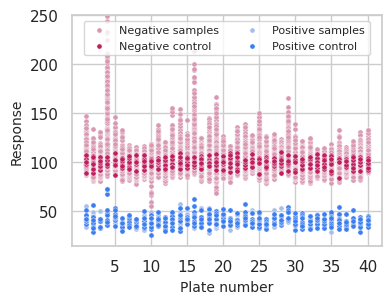

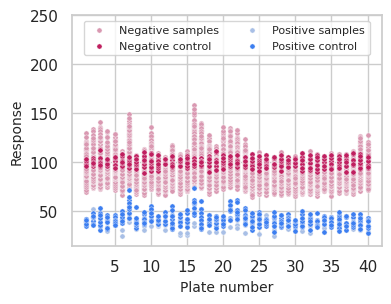

In [36]:
# Supplement Figure not included
fig_name = "0.03-10-10-0.99-stdev-3-4"
residuals_filename = data_dir+'screening-residuals-10-10-0.03-pna-0.99-20230307-data-plots-supplement-stdev-3-4.csv'

util.plot_screening_plates(residuals_filename, fig_name=fig_name, fig_dir=fig_dir,max_value=250)

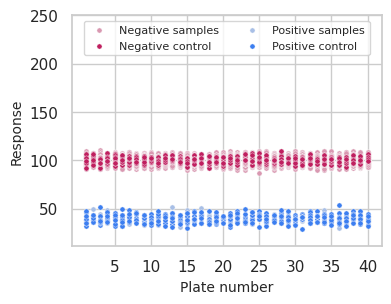

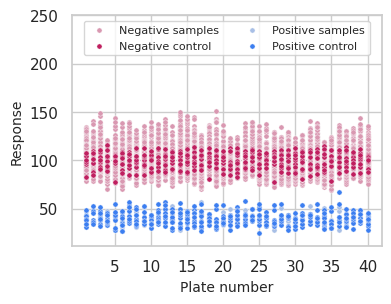

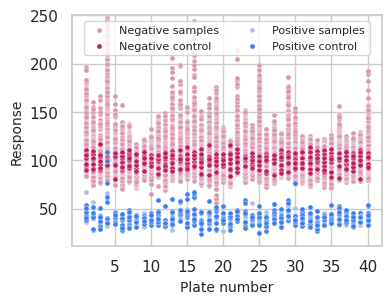

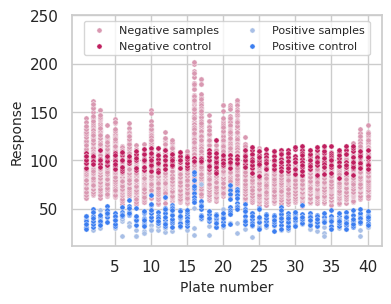

In [37]:
# Supplement Figure not included
fig_name = "0.05-10-10-0.99-stdev-3-4"
residuals_filename = data_dir+'screening-residuals-10-10-0.05-pna-0.99-20230307-data-plots-supplement-stdev-3-4.csv'

util.plot_screening_plates(residuals_filename, fig_name=fig_name, fig_dir=fig_dir,max_value=250)

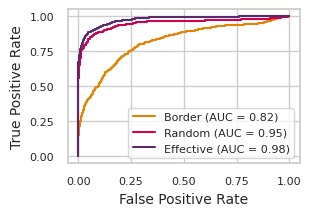

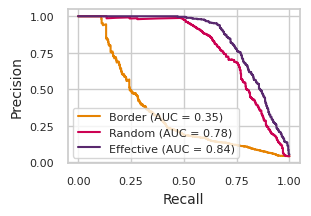

Mean and std of PLAID layouts: 0.84  $\pm$ (0.01)
Mean and std of RANDOM layouts: 0.77  $\pm$ (0.023)
Mean and std of BORDER layouts: 0.34  $\pm$ (0.017)

Variance of PLAID layouts: 9.327922026436623e-05
Variance of RANDOM layouts: 0.0005484359451693062
Variance of BORDER layouts: 0.0003058153962605763 

Case of equal variance:
PLAID vs RANDOM layouts: Ttest_indResult(statistic=8.843156497150868, pvalue=5.717446760156191e-08)
RANDOM vs BORDER layouts: Ttest_indResult(statistic=-46.285962842436916, pvalue=3.602235056115898e-20)
PLAID vs BORDER layouts: Ttest_indResult(statistic=78.93149532021535, pvalue=2.5381012466246952e-24) 

Case of not equal variance:
PLAID vs RANDOM layouts: Ttest_indResult(statistic=8.84315649715087, pvalue=1.3489016895329428e-06)
RANDOM vs BORDER layouts: Ttest_indResult(statistic=-46.285962842436916, pvalue=4.912408253060515e-19)
PLAID vs BORDER layouts: Ttest_indResult(statistic=78.93149532021535, pvalue=5.627209536099867e-20)


In [38]:
# In the manuscript (Figure 3f)
residuals_filename = data_dir+'screening-residuals-10-10-0.2-pna-0.99-20220509-multiple-batches.csv'

fig_name = '10-10-0.2-1.png'

util.plot_roc_curves(residuals_filename, 'ROC-'+fig_name, fig_dir, batch=6)
util.plot_pr_curves(residuals_filename, 'PR-'+fig_name, fig_dir, batch=6)

util.pr_table_code(residuals_filename)

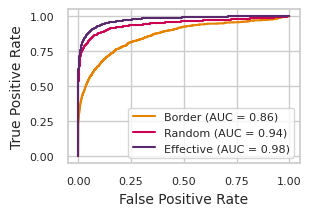

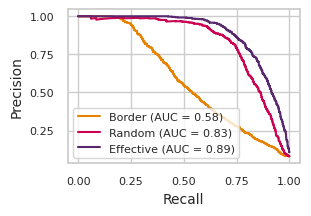

Mean and std of PLAID layouts: 0.89  $\pm$ (0.006)
Mean and std of RANDOM layouts: 0.82  $\pm$ (0.015)
Mean and std of BORDER layouts: 0.6  $\pm$ (0.011)

Variance of PLAID layouts: 3.345641469740227e-05
Variance of RANDOM layouts: 0.00021651025878772337
Variance of BORDER layouts: 0.00011133446578798921 

Case of equal variance:
PLAID vs RANDOM layouts: Ttest_indResult(statistic=12.988649888680854, pvalue=1.3965213877399234e-10)
RANDOM vs BORDER layouts: Ttest_indResult(statistic=-39.343598703126396, pvalue=6.532251321879015e-19)
PLAID vs BORDER layouts: Ttest_indResult(statistic=76.26827025182413, pvalue=4.699641146954649e-24) 

Case of not equal variance:
PLAID vs RANDOM layouts: Ttest_indResult(statistic=12.988649888680854, pvalue=2.594386692359017e-08)
RANDOM vs BORDER layouts: Ttest_indResult(statistic=-39.343598703126396, pvalue=1.321243822079428e-17)
PLAID vs BORDER layouts: Ttest_indResult(statistic=76.26827025182413, pvalue=1.0653916543190633e-19)


In [39]:
# In the manuscript (Figure 3g)
residuals_filename = data_dir+'screening-residuals-10-10-0.2-pna-0.95-20220510-multiple-batches.csv'

fig_name = '10-10-0.2-5.png'

util.plot_roc_curves(residuals_filename, 'ROC-'+fig_name, fig_dir, batch=9)
util.plot_pr_curves(residuals_filename, 'PR-'+fig_name, fig_dir, batch=9)

util.pr_table_code(residuals_filename)

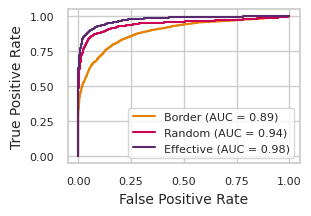

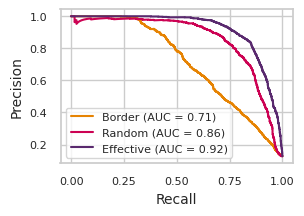

Mean and std of PLAID layouts: 0.91  $\pm$ (0.004)
Mean and std of RANDOM layouts: 0.86  $\pm$ (0.011)
Mean and std of BORDER layouts: 0.71  $\pm$ (0.012)

Variance of PLAID layouts: 1.2766113913443404e-05
Variance of RANDOM layouts: 0.00011488361562243856
Variance of BORDER layouts: 0.00014721487931390856 

Case of equal variance:
PLAID vs RANDOM layouts: Ttest_indResult(statistic=14.761144853697736, pvalue=1.6856874053516436e-11)
RANDOM vs BORDER layouts: Ttest_indResult(statistic=-30.398408310843507, pvalue=6.350007247333089e-17)
PLAID vs BORDER layouts: Ttest_indResult(statistic=52.09437197916151, pvalue=4.354570386926936e-21) 

Case of not equal variance:
PLAID vs RANDOM layouts: Ttest_indResult(statistic=14.761144853697738, pvalue=1.3851390362937661e-08)
RANDOM vs BORDER layouts: Ttest_indResult(statistic=-30.398408310843507, pvalue=9.565781964835587e-17)
PLAID vs BORDER layouts: Ttest_indResult(statistic=52.09437197916151, pvalue=4.5510555839284454e-14)


In [40]:
# In the supplement, Figure 23a
residuals_filename = data_dir+'screening-residuals-10-10-0.2-pna-0.9-20220510-multiple-batches.csv'

fig_name = '10-10-0.2-10.png'

util.plot_roc_curves(residuals_filename, 'ROC-'+fig_name, fig_dir, batch=0)
util.plot_pr_curves(residuals_filename, 'PR-'+fig_name, fig_dir, batch=0)

util.pr_table_code(residuals_filename)

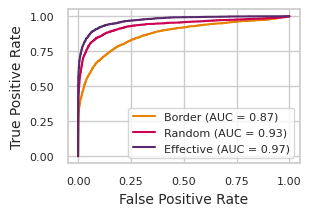

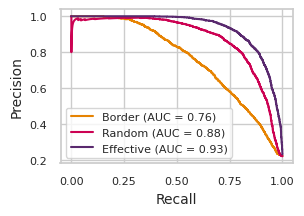

In [41]:
# In the supplement, Figure 23b
residuals_filename = data_dir+'screening-residuals-10-10-0.2-pna-0.8-20221122-ROC-supplement.csv'

fig_name = '10-10-0.2-20.png'

util.plot_roc_curves(residuals_filename, 'ROC-'+fig_name, fig_dir, batch=2)
util.plot_pr_curves(residuals_filename, 'PR-'+fig_name, fig_dir, batch=2)

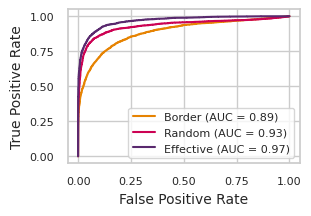

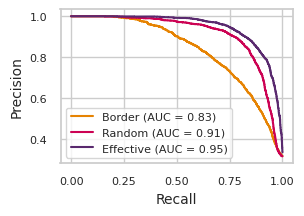

In [42]:
# In the supplement, Figure 23c 
residuals_filename = data_dir+'screening-residuals-10-10-0.2-pna-0.7-20221122-ROC-supplement.csv'

fig_name = '10-10-0.2-30.png'

util.plot_roc_curves(residuals_filename, 'ROC-'+fig_name, fig_dir,batch=6)
util.plot_pr_curves(residuals_filename, 'PR-'+fig_name, fig_dir,batch=6)

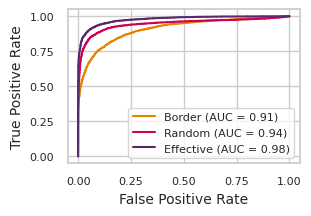

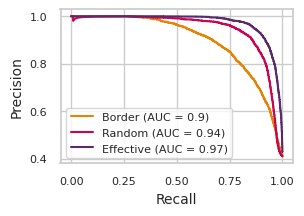

Mean and std of PLAID layouts: 0.97  $\pm$ (0.001)
Mean and std of RANDOM layouts: 0.95  $\pm$ (0.002)
Mean and std of BORDER layouts: 0.9  $\pm$ (0.004)

Variance of PLAID layouts: 9.019072840245049e-07
Variance of RANDOM layouts: 4.327123906232499e-06
Variance of BORDER layouts: 1.408412646922864e-05 

Case of equal variance:
PLAID vs RANDOM layouts: Ttest_indResult(statistic=34.14545436605081, pvalue=8.106712165277401e-18)
RANDOM vs BORDER layouts: Ttest_indResult(statistic=-31.252233164601815, pvalue=3.890957067907102e-17)
PLAID vs BORDER layouts: Ttest_indResult(statistic=54.80985001217936, pvalue=1.7542434633329683e-21) 

Case of not equal variance:
PLAID vs RANDOM layouts: Ttest_indResult(statistic=34.14545436605081, pvalue=8.542546772327308e-14)
RANDOM vs BORDER layouts: Ttest_indResult(statistic=-31.252233164601815, pvalue=2.1703410437726408e-14)
PLAID vs BORDER layouts: Ttest_indResult(statistic=54.80985001217936, pvalue=6.945857579771518e-14)


In [43]:
# In the supplement, Figure 23d
residuals_filename = data_dir+'screening-residuals-10-10-0.2-pna-0.6-20220510-multiple-batches.csv'

fig_name = '10-10-0.2-40.png'

util.plot_roc_curves(residuals_filename, 'ROC-'+fig_name, fig_dir)
util.plot_pr_curves(residuals_filename, 'PR-'+fig_name, fig_dir)

util.pr_table_code(residuals_filename)

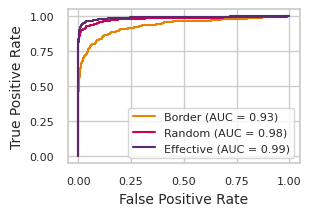

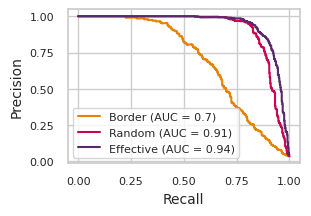

In [44]:
# In the supplement, Figure 24a 
residuals_filename = data_dir+'screening-residuals-8-8-0.1-pna-0.99-20220920-paper-ROC.csv'

fig_name = '8-8-0.1-1.png'

util.plot_roc_curves(residuals_filename, 'ROC-'+fig_name, fig_dir)
util.plot_pr_curves(residuals_filename, 'PR-'+fig_name, fig_dir)

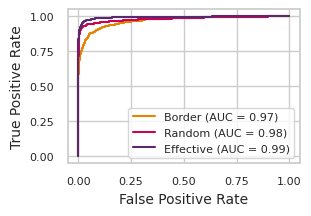

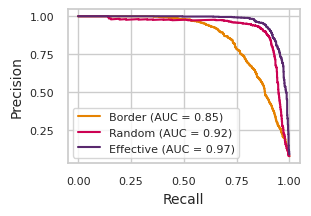

In [45]:
# In the supplement, Figure 24b 
residuals_filename = data_dir+'screening-residuals-8-8-0.1-pna-0.95-20220920-paper-ROC.csv'

fig_name = '8-8-0.1-5.png'

util.plot_roc_curves(residuals_filename, 'ROC-'+fig_name, fig_dir, batch=1)
util.plot_pr_curves(residuals_filename, 'PR-'+fig_name, fig_dir, batch=1)

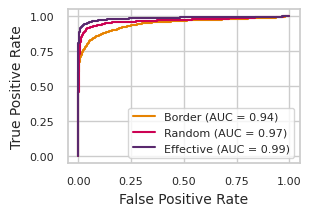

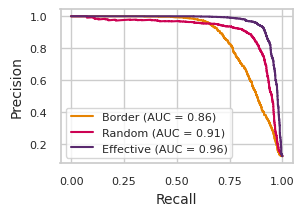

In [46]:
# In the supplement, Figure 24c 
residuals_filename = data_dir+'screening-residuals-8-8-0.1-pna-0.9-20221122-ROC-supplement.csv'

fig_name = '8-8-0.1-10.png'

util.plot_roc_curves(residuals_filename, 'ROC-'+fig_name, fig_dir, batch=6)
util.plot_pr_curves(residuals_filename, 'PR-'+fig_name, fig_dir, batch=6)

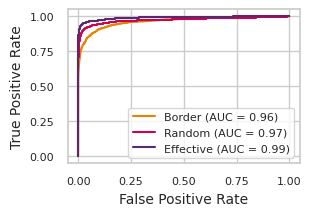

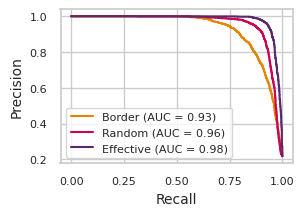

In [47]:
# In the supplement, Figure 24d 
residuals_filename = data_dir+'screening-residuals-8-8-0.1-pna-0.8-20221122-ROC-supplement.csv'

fig_name = '8-8-0.1-20.png'

util.plot_roc_curves(residuals_filename, 'ROC-'+fig_name, fig_dir, batch=6)
util.plot_pr_curves(residuals_filename, 'PR-'+fig_name, fig_dir, batch=6)

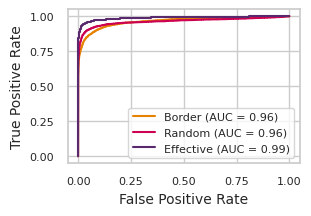

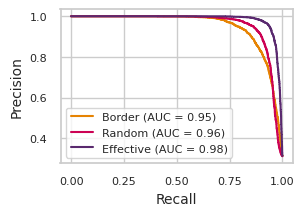

In [48]:
# In the supplement, Figure 24e 
residuals_filename = data_dir+'screening-residuals-8-8-0.1-pna-0.7-20221122-ROC-supplement.csv'

fig_name = '8-8-0.1-30.png'

util.plot_roc_curves(residuals_filename, 'ROC-'+fig_name, fig_dir, batch=6)
util.plot_pr_curves(residuals_filename, 'PR-'+fig_name, fig_dir, batch=6)

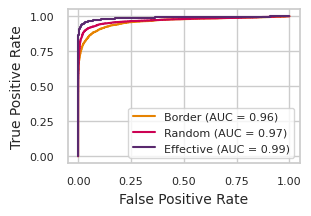

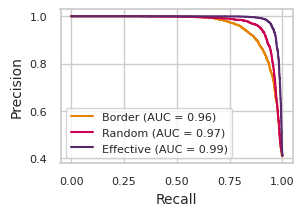

Mean and std of PLAID layouts: 0.99  $\pm$ (0.001)
Mean and std of RANDOM layouts: 0.97  $\pm$ (0.003)
Mean and std of BORDER layouts: 0.96  $\pm$ (0.002)

Variance of PLAID layouts: 1.4358113449830043e-06
Variance of RANDOM layouts: 8.502918232568134e-06
Variance of BORDER layouts: 6.1170459557936334e-06 

Case of equal variance:
PLAID vs RANDOM layouts: Ttest_indResult(statistic=14.439575661834366, pvalue=2.4334058322147914e-11)
RANDOM vs BORDER layouts: Ttest_indResult(statistic=-8.277836805171178, pvalue=1.501981726553136e-07)
PLAID vs BORDER layouts: Ttest_indResult(statistic=28.080829715523077, pvalue=2.573564268304188e-16) 

Case of not equal variance:
PLAID vs RANDOM layouts: Ttest_indResult(statistic=14.439575661834366, pvalue=6.2830459610427765e-09)
RANDOM vs BORDER layouts: Ttest_indResult(statistic=-8.277836805171178, pvalue=1.8229624858310707e-07)
PLAID vs BORDER layouts: Ttest_indResult(statistic=28.080829715523077, pvalue=5.032455452964243e-13)


In [49]:
# In the supplement, Figure 24f
residuals_filename = data_dir+'screening-residuals-8-8-0.1-pna-0.6-20221122-ROC-supplement.csv'

fig_name = '8-8-0.1-40.png'

util.plot_roc_curves(residuals_filename, 'ROC-'+fig_name, fig_dir, batch=3)
util.plot_pr_curves(residuals_filename, 'PR-'+fig_name, fig_dir, batch=3)

util.pr_table_code(residuals_filename)

# The End! :-)